In [49]:
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website Title</title>
    <style>
        :root {
            scroll-padding-top: 100px; /* Adjust this value to ensure content is not hidden behind the header */
        }        
        body {
            margin: 0;
            padding: 0;
            height: 100%;
        }
        .header {
            color: white;
            text-align: center;
            position: fixed;
            left: 0;
            top: 0;
            width: 100%;
            padding: 0.00001px 0; /* Adjust padding as needed */
            z-index: 1000; /* High z-index to stay on top */
            background: url('www.jpg') center/cover;
        }

        .footer {
            background-color: #333; /* Footer background color */
            color: white;
            text-align: center;
            position: fixed;
            width: 100%;
            padding: 0.0001px 0;
            z-index: 1000; /* High z-index to stay on top */
            bottom: 0;
            left: 0;
        }
        .sidebar {
            position: fixed;
            font-size: 13px;
            top: 80px; /* Adjust based on new header height */
            bottom: 30px; /* Adjust based on new footer height */
            left: 0;
            width: 270px; /* Sidebar width */
            overflow-y: auto; /* Scrollable contents if overflow */
            background-color: #f2f2f2; /* Sidebar background color */
            padding: 20px;
        }
        .content {
            margin-left: 220px; /* Adjust based on sidebar width */
            margin-top: -10px;
            padding: 20px;
            height: 2000px; /* Just for demonstration */
        }
        .submenu {
            display: none;
            padding-left: 20px;
        }
    </style>
</head>
<body>
<div class="header">
<img src="UC1.png" alt="Left Image" style="position: fixed; top: 0; left: 0; max-height: 65px; max-width: 150px;">
    <h1>CINCINNATI ZILLOW SALES FORECAST</h1>
<img src="UC1.png" alt="Right Image" style="position: fixed; top: 0; right: 0; max-height: 65px; max-width: 150px;">
</div>
<div class="sidebar">
    <h2>TABLE OF CONTENTS</h2>
    <ul>
        <li><a href="javascript:void(0);" onclick="toggleMenu('submenu1')">SECTION 1.0: EDA & Time Series Decompositiom</a></li>
        <ul id="submenu1" class="submenu">
            <li><a href="#section-1.1-introduction">Introduction</a></li>
            <li><a href="#section-1.2-data-summary">Data Summary</a></li>
            <li><a href="#section-1.3-time-series-analysis-and-decomposition">Time Series Analysis & Decomposition</a></li>
            <li><a href="#section-1.4-splitting-of-time-series-data">Splitting of Time Series Data</a></li>
        </ul>
        <li><a href="javascript:void(0);" onclick="toggleMenu('submenu2')">SECTION 2.0: ARIMA Model</a></li>
        <ul id="submenu2" class="submenu">
            <li><a href="#section-2.1-stationarity-analysis">Stationarity Analysis</a></li>
            <li><a href="#section-2.2-acfpacf-plot-analysis">ACF/PACF Plot Analysis</a></li>
            <li><a href="#section-2.3-arima-model-comparison">ARIMA Model Comparison</a></li>
            <li><a href="#section-2.4-residual-analysis">Residual Analysis</a></li>
        </ul>
        <li><a href="javascript:void(0);" onclick="toggleMenu('submenu3')">SECTION 3.0: Meta Prophet Model</a></li>
        <ul id="submenu3" class="submenu">
            <li><a href="#section-3.1-default-prophet-model">Default Prophet Model</a></li>
            <li><a href="#section-3.2-prophet-decomposition">Prophet Decomposition</a></li>
            <li><a href="#section-3.3-linear-vs-logistic-growth">Linear vs Logistic Growth</a></li>
            <li><a href="#section-3.4-seasonality-identification">Seasonality Identification</a></li>
            <li><a href="#section-3.5-holidays-impact">Holidays Impact</a></li>
            <li><a href="#section-3.6-best-prophet-model">Best Prophet Model</a></li>
        </ul>
        <li><a href="javascript:void(0);" onclick="toggleMenu('submenu4')">SECTION 4.0: Models Comparison & Cross Validatiom</a></li>
        <ul id="submenu4" class="submenu">
            <li><a href="#section-4.1-rolling-window-setup">Rolling Window Setup</a></li>
            <li><a href="#section-4.2-calculating-performance-metrics">Calculating Performance Metrics</a></li>
            <li><a href="#section-4.3-fitting-models-on-train-set">Fitting Models on Train Set</a></li>
            <li><a href="#section-4.4-fitting-best-model">Fitting Best Model</a></li>
        </ul>
    </ul>
</div>
<div class="footer">
    <p>&copy;Submitted by Falguni Bharadwaj - BANA-7050-002(Forecasting Methods)</p>
</div>
<script>
    function toggleMenu(menuId) {
        var submenu = document.getElementById(menuId);
        if (submenu.style.display === "none") {
            submenu.style.display = "block";
        } else {
            submenu.style.display = "none";
        }
    }
</script>
</body>
</html>

## Section 1.1: INTRODUCTION

<div style="text-align: justify"> The dataset from the link is a time series of monthly sales counts of single-family residences and condos in Cincinnati Metroplotian Area of Ohio state of the United States, from January 2018 to October 2023. The data is published by Zillow, a leading online real estate marketplace that provides housing data and research. Further data can be downloaded from link below.</div>

**[Zillow Sales Data Link](https://www.zillow.com/research/data/)**
<br><br>
   
<div style="text-align: justify">Some potential explanations of the data-generating process are: <br>

- The sales count of a metro area depends on the supply and demand of homes in that market, which are influenced by various factors such as population growth, income, employment, interest rates, consumer preferences, housing affordability, availability of credit, seasonality, and local policies.
- The sales count of a metro area may also be affected by external shocks such as natural disasters, pandemics, recessions, or policy changes that disrupt the normal functioning of the housing market.
- The sales count of a metro area may exhibit trends, cycles, seasonality, and irregular fluctuations over time, reflecting the dynamic and complex nature of the housing market. </div>

<div style="text-align: justify">Forecasting the sales count of a metro area may be easy or difficult depending on the availability and quality of data, the choice of forecasting methods, the accuracy of assumptions, and the degree of uncertainty and volatility in the market. Some challenges that may arise in forecasting the sales count are: <br>

- The sales count data may be subject to revisions, delays, or errors in reporting, which may affect the reliability and timeliness of the forecasts.
- The sales count data may exhibit non-stationarity, non-linearity, heteroskedasticity, or structural breaks, which may violate the assumptions of some forecasting methods and require appropriate transformations, tests, or corrections.
- The sales count data may be influenced by many factors that are difficult to measure, predict, or control, such as consumer expectations, preferences, and behavior, or unanticipated events that may cause sudden shifts or shocks in the market.
- The sales count data may have different patterns or relationships across different metro areas, time periods, or segments of the market, which may require different models, variables, or parameters to capture the heterogeneity and complexity of the market. </div>

## Section 1.2: DATA SUMMARY

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from tabulate import tabulate
from pandas.plotting import lag_plot
import matplotlib.dates as mdates
from IPython.display import display
from scipy.stats import boxcox
import plotly.graph_objects as go
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("whitegrid")
from prophet.diagnostics import cross_validation, performance_metrics
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset
from datetime import timedelta
from pmdarima.arima import auto_arima

data = pd.read_csv("zillow_sales.csv", parse_dates=['date'])
display(data)

RegionName       date  zillow_sales
0    Cincinnati, OH 2008-02-01        1603.0
1    Cincinnati, OH 2008-03-01        1873.0
2    Cincinnati, OH 2008-04-01        1963.0
3    Cincinnati, OH 2008-05-01        2276.0
4    Cincinnati, OH 2008-06-01        2442.0
..              ...        ...           ...
185  Cincinnati, OH 2023-07-01        2537.0
186  Cincinnati, OH 2023-08-01        2603.0
187  Cincinnati, OH 2023-09-01        2322.0
188  Cincinnati, OH 2023-10-01        2307.0
189  Cincinnati, OH 2023-11-01        2170.0

[190 rows x 3 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegionName    190 non-null    object        
 1   date          190 non-null    datetime64[ns]
 2   zillow_sales  190 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.6+ KB


In [4]:
data.describe()

date  zillow_sales
count                            190    190.000000
mean   2015-12-16 10:59:22.105263104   2552.928947
min              2008-02-01 00:00:00   1082.000000
25%              2012-01-08 18:00:00   2006.750000
50%              2015-12-16 12:00:00   2490.000000
75%              2019-11-23 12:00:00   3126.500000
max              2023-11-01 00:00:00   4180.000000
std                              NaN    732.240948

* Our dataset consists number of sales from 1st February 2008 till 1st November 2023. In other words the sales values are monthly data from January 2008 till October 2023.
* The sales numbers range from a **low of 1082** to a **high of 4180** with a **mean of 2552.93** and **median of 2490**. It looks like the sales number follow an increasing trend.
* Now let us determine the patterns of the growth of sales.

In [5]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In the figure below we have two plots.

* The first diagram gives a plot of average monthly sales across the years from 2008 to 2023.
* The right side diagram gives a plot of average sales for a particular year from 2008 to 2023.
* The data for these two plots can be found below the plots.

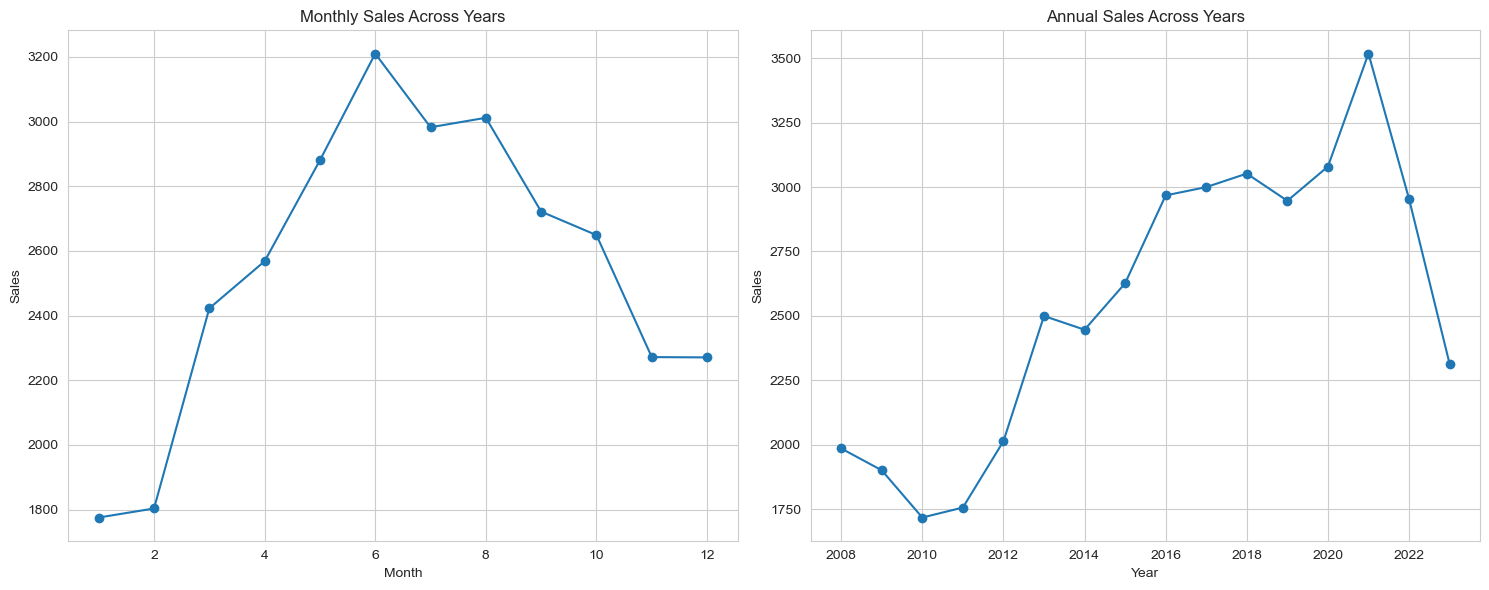

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Monthly Sales
monthly_sales = data.groupby('month')['zillow_sales'].mean()
axes[0].plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
axes[0].set_title('Monthly Sales Across Years')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].grid(True)

# Plot Annual Sales
annual_sales = data.groupby('year')['zillow_sales'].mean()
axes[1].plot(annual_sales.index, annual_sales.values, marker='o', linestyle='-')
axes[1].set_title('Annual Sales Across Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

plt.tight_layout()
plt.show()

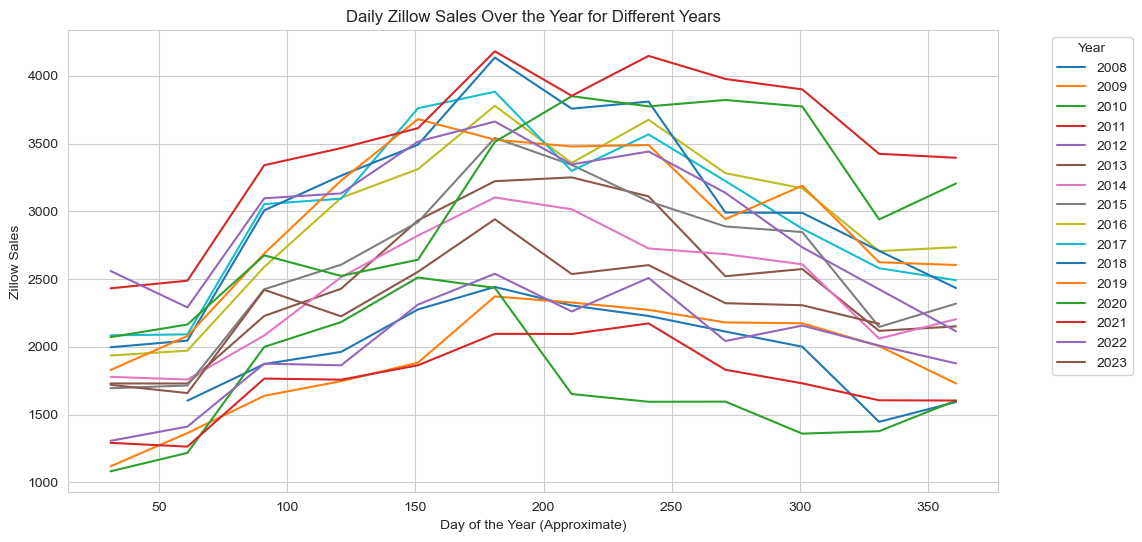

In [7]:
# Group the data by year, month, and day, calculate the sum of zillow_sales for each day
daily_zillow_sales = data.groupby(['year','month','day'])['zillow_sales'].sum().reset_index()

# Plot the daily zillow_sales for different years on the same graph
plt.figure(figsize=(12, 6))

# Iterate through each unique year and plot the zillow_sales values
for year in data['year'].unique():
    year_data = daily_zillow_sales[daily_zillow_sales['year'] == year]
    day_of_year = year_data['month'] * 30 + year_data['day']  # Approximate day of the year
    plt.plot(day_of_year, year_data['zillow_sales'], label=str(year), linestyle='-')

plt.title('Daily Zillow Sales Over the Year for Different Years')
plt.xlabel('Day of the Year (Approximate)')
plt.ylabel('Zillow Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot
plt.grid(True)
plt.show()

* The first plot of **Average monthly Sales Across Years** & the above plot of **Daily Zillow Sales Over the Year for Different Years** give us a rough indication that the sales for a year start from the lowest and reach their highest values mostly during summer months (within 150th - 250th day) and then decline gradually through the autumn to winter.

In [8]:
monthly_sales = monthly_sales.round(2)
annual_sales = annual_sales.round(2)

table_monthly = tabulate(pd.DataFrame({'Month': monthly_sales.index, 'Average Sales': monthly_sales.values}),
                         headers='keys', tablefmt='pretty', showindex=False)

table_annual = tabulate(pd.DataFrame({'Year': annual_sales.index, 'Average Sales': annual_sales.values}),
                        headers='keys', tablefmt='pretty', showindex=False)

print("Monthly Sales:\n", table_monthly)
print("\nAnnual Sales:\n", table_annual)

Monthly Sales:
 +-------+---------------+
| Month | Average Sales |
+-------+---------------+
|  1.0  |    1775.67    |
|  2.0  |    1803.62    |
|  3.0  |    2422.62    |
|  4.0  |    2568.25    |
|  5.0  |    2880.44    |
|  6.0  |    3210.38    |
|  7.0  |    2982.56    |
|  8.0  |    3011.94    |
|  9.0  |    2721.75    |
| 10.0  |    2649.06    |
| 11.0  |    2271.78    |
| 12.0  |    2270.87    |
+-------+---------------+

Annual Sales:
 +--------+---------------+
|  Year  | Average Sales |
+--------+---------------+
| 2008.0 |    1985.82    |
| 2009.0 |    1901.17    |
| 2010.0 |    1717.92    |
| 2011.0 |    1756.67    |
| 2012.0 |    2013.83    |
| 2013.0 |    2499.67    |
| 2014.0 |    2446.5     |
| 2015.0 |    2626.58    |
| 2016.0 |    2967.5     |
| 2017.0 |    2999.75    |
| 2018.0 |    3052.08    |
| 2019.0 |    2946.58    |
| 2020.0 |    3079.33    |
| 2021.0 |    3517.58    |
| 2022.0 |    2954.29    |
| 2023.0 |    2314.45    |
+--------+---------------+


Now if we want to have a look at the trend of annual change of sales for a particular month we get the following patterns:<br> where,<br>month = 1 denotes January<br>month = 2 denotes February<br>.<br>.<br>month = 12 denotes December.

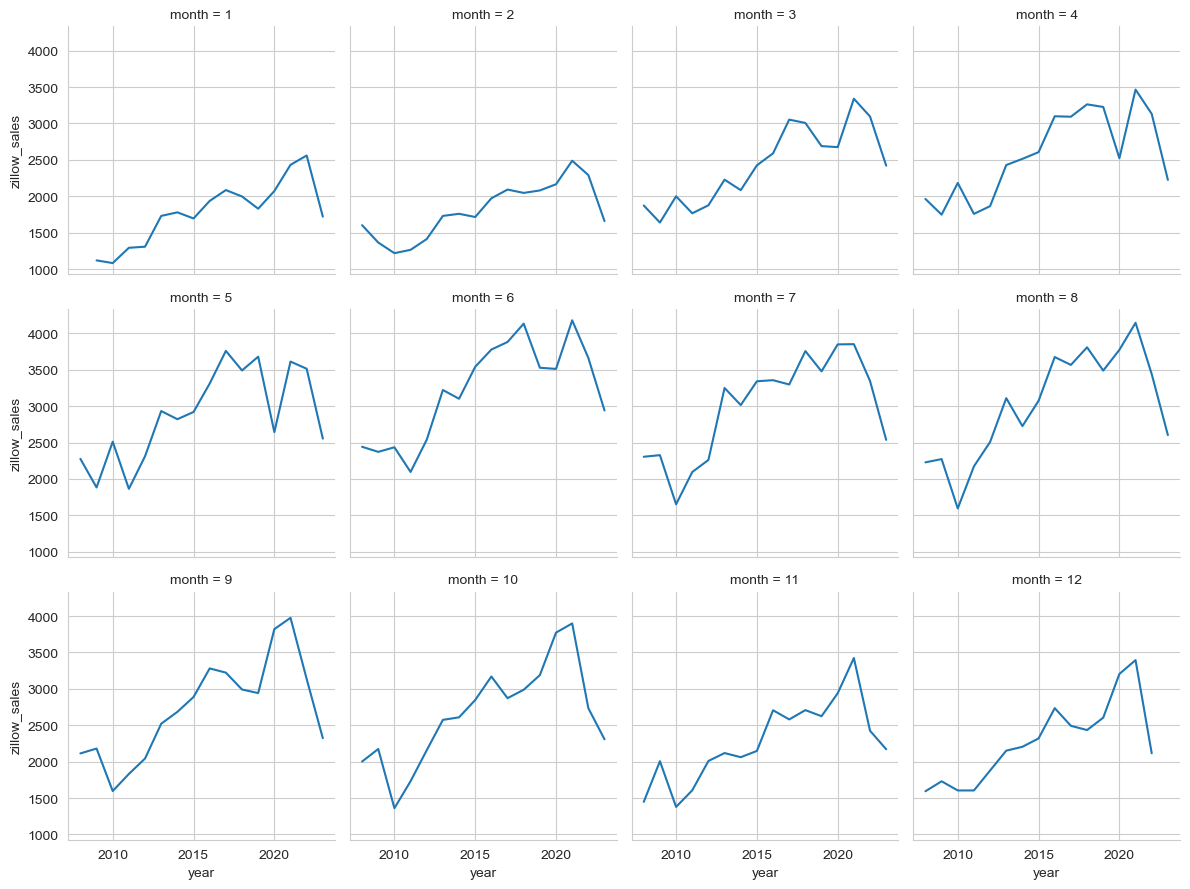

In [9]:
copy1 = data.copy()
copy1.set_index('date', inplace=True)
d = copy1.assign(year=copy1.index.year, month=copy1.index.month)

# Create a FacetGrid with 'month' as columns
g = sns.FacetGrid(d, col='month', col_wrap=4)

# Map line plots onto the FacetGrid
g.map(plt.plot, 'year', 'zillow_sales')

# Show the plot
plt.show()

Now if we plot the monthly sales for the entire dataset or our range, we get a following pattern with a linear trend line as follows:

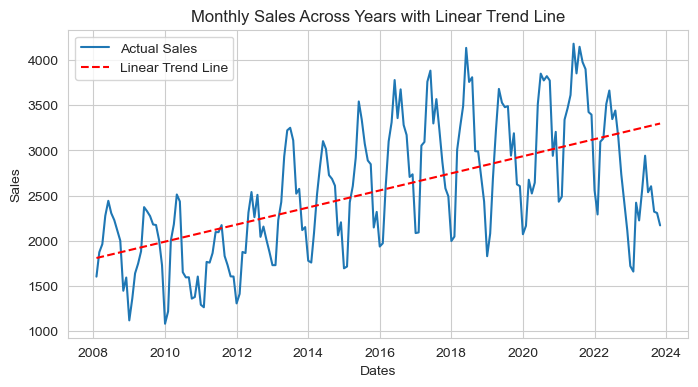

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(data['date'], data['zillow_sales'], linestyle='-', label='Actual Sales')

slope, intercept = np.polyfit(pd.to_numeric(data['date']), data['zillow_sales'], 1)
linear_fit = slope * pd.to_numeric(data['date']) + intercept

plt.plot(data['date'], linear_fit, linestyle='--', color='red', label='Linear Trend Line')

plt.title('Monthly Sales Across Years with Linear Trend Line')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

An initial analysis of the data reveals some interesting patterns and features:

* The time-series data shows a fluctuating pattern of Zillow sales over time.
* There is an overall increasing trend in sales as indicated by the linear trend line.
* Sales peak around mid-2021 and then experience a significant decline.
* The plot with trend line shows periodic crests and troughs indicating seasonality.
* On average, the summer months June-July witness the highest sales followed by a gradual decline, which rises back again next summer, followed by a decline in winter the same year and so on.

Now if we want a trend curve instead of a linear line, we get the following curve in the second graph below:

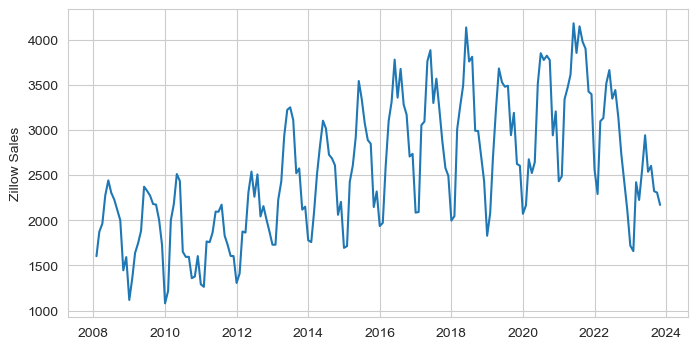

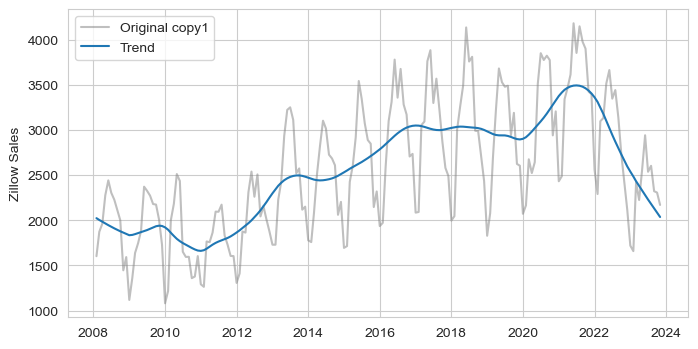

In [11]:
# Plot the original time series
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(copy1['zillow_sales'])
ax.set(ylabel='Zillow Sales')
ax.grid(True)

# Perform Seasonal-Trend decomposition using LOESS (STL)
fit = sm.tsa.STL(copy1['zillow_sales']).fit()

# Plot the original copy1 in light gray and the trend component
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(copy1['zillow_sales'], color='.5', alpha=.5, label='Original copy1')
ax.plot(fit.trend, label='Trend')
ax.set(ylabel='Zillow Sales')
ax.legend()
ax.grid(True)
plt.show()

<div style="text-align: justify">The initial analysis suggests that the data is likely influenced by seasonal factors, such as the housing market's fluctuations, economic conditions, and interest rates. The observed pattern in the data could be due to factors like an increase in demand during specific times of the year or changes in real estate trends over the period.To gain deeper insights, it's essential to conduct further analysis with the actual data, including:</div>

* Decomposing the time series to isolate trend, seasonality, and cyclical components
* Identifying any outliers or anomalous events
* Exploring correlations with potential explanatory variables

## Section 1.3: TIME SERIES ANALYSIS and DECOMPOSITION

<div style="text-align: justify">As there seems a lot of noise as compared to the trend curve, let us plot a moving average of the time series in 3-month, 6-month, 9-month and 12-month moving averages to gradually smooth out the fluctuations and reveal the underlying trend and seasonality of the data.</div>

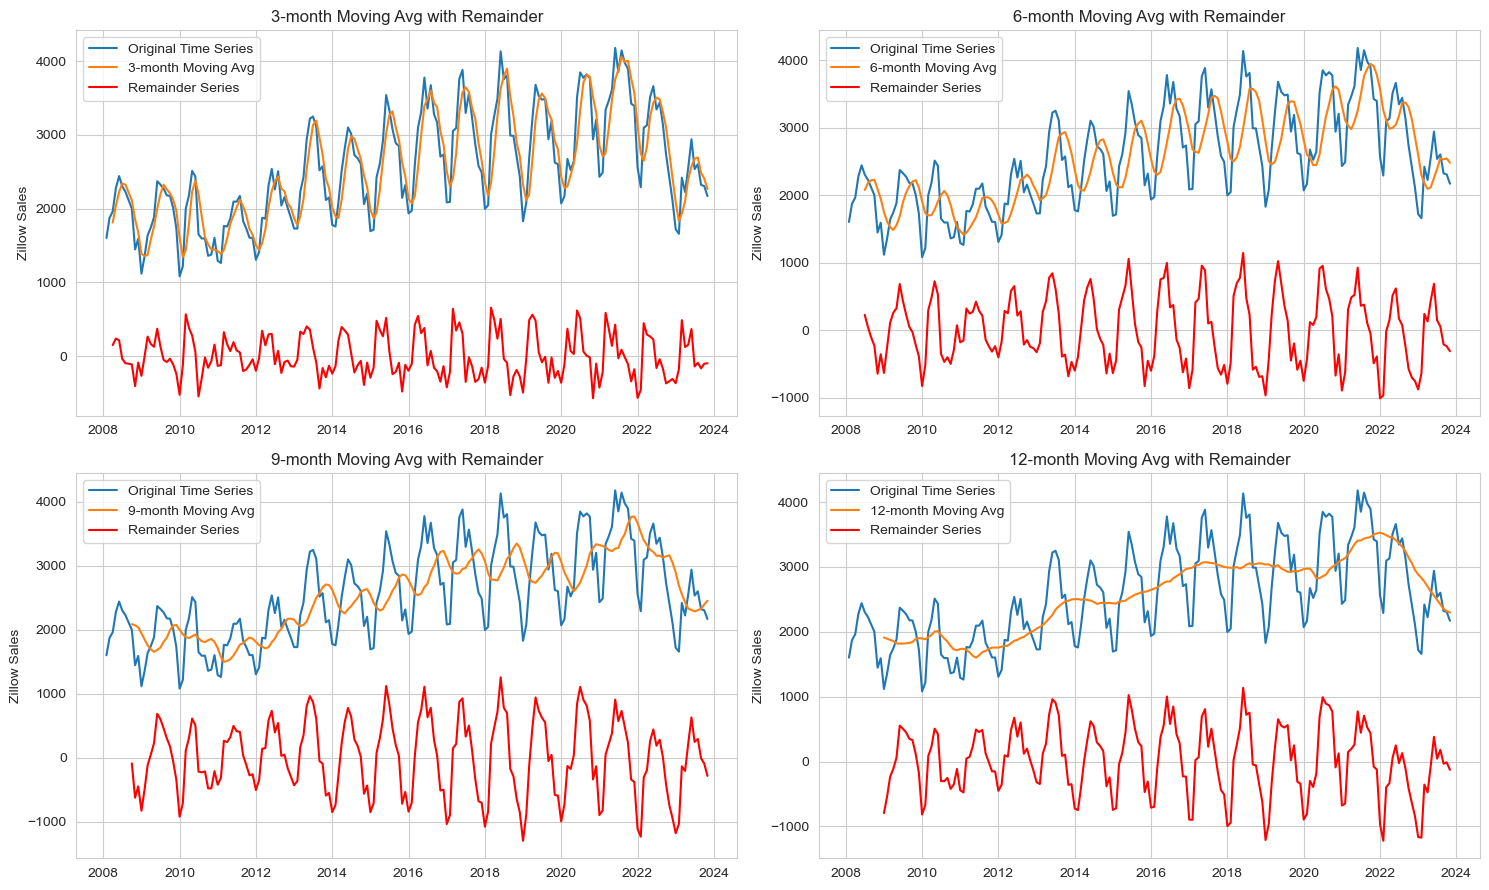

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
rolls = [3, 6, 9, 12]

for (ax, roll) in zip(axs.ravel(), rolls):
    # Plot the original time series
    ax.plot(copy1.zillow_sales, label='Original Time Series')
    
    # Plot the moving average
    ax.plot(copy1.zillow_sales.rolling(roll).mean(), label=f'{roll}-month Moving Avg')
    
    # Calculate and plot the remainder series
    remainder_series = copy1.zillow_sales - copy1.zillow_sales.rolling(roll).mean()
    ax.plot(remainder_series, label='Remainder Series', color='red')

    ax.set(ylabel='Zillow Sales', title=f'{roll}-month Moving Avg with Remainder')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

The graphs above shows four different moving average plots with remainder over time, each with a different averaging period (3-month, 6-month, 9-month, and 12-month). The plots illustrate how increasing the averaging period smoothens the data, reducing the effects of short-term fluctuations and highlighting longer-term trends or cycles.

**Key Inferences from the Moving Average Plots:**

***1. General Trend:***

All moving averages (3-month, 6-month, 9-month, and 12-month) consistently show an upward trend in Zillow sales from 2008 to 2024. This suggests a long-term growth trajectory in sales.

***2. Short-Term Fluctuations:***

The 3-month moving average exhibits the most frequent fluctuations, reflecting short-term variations in sales.
Longer-term moving averages (9-month and 12-month) are smoother, indicating that they filter out more short-term noise.

***3. Recent Acceleration:***

The upward trend appears to have accelerated slightly in the last few years (2020-2024), with all moving averages rising more steeply. This could potentially signal a recent boost in sales activity.

***4. Potential Seasonality:***

While not definitively visible in the limited time frame, there might be a slight seasonal pattern, with sales potentially dipping in certain months or quarters. Longer-term analysis could reveal more about seasonal patterns.

**Recommendations:**

*Further Analysis:* To confirm these inferences and explore additional patterns, it's recommended to conduct further analysis with the actual data, including:

* Decomposing the time series to isolate trend, seasonality, and cyclical components.
* Building predictive models to forecast future sales.

Now let us decompose the time series data, which fetches us the following graphs:

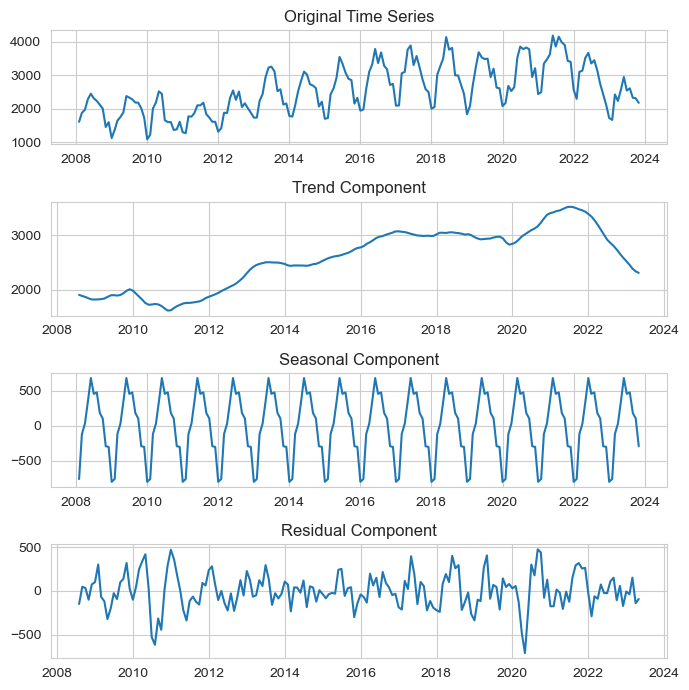

In [13]:
fit = sm.tsa.seasonal_decompose(copy1.zillow_sales)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(7, 7))

ax1.plot(copy1.zillow_sales)
ax1.set_title('Original Time Series')

ax2.plot(fit.trend)
ax2.set_title('Trend Component')

ax3.plot(fit.seasonal)
ax3.set_title('Seasonal Component')

ax4.plot(fit.resid, linestyle='-')
ax4.set_title('Residual Component')

plt.tight_layout()
plt.show()

The seasonal component indicates a pattern of seasonality in our time series. But we are unable to deduce to time frame of the seasonality from this simple plot. As our time series is a monthly series, let us find us the correlation from lag plots from lag = 1 to lag = 12 as below:

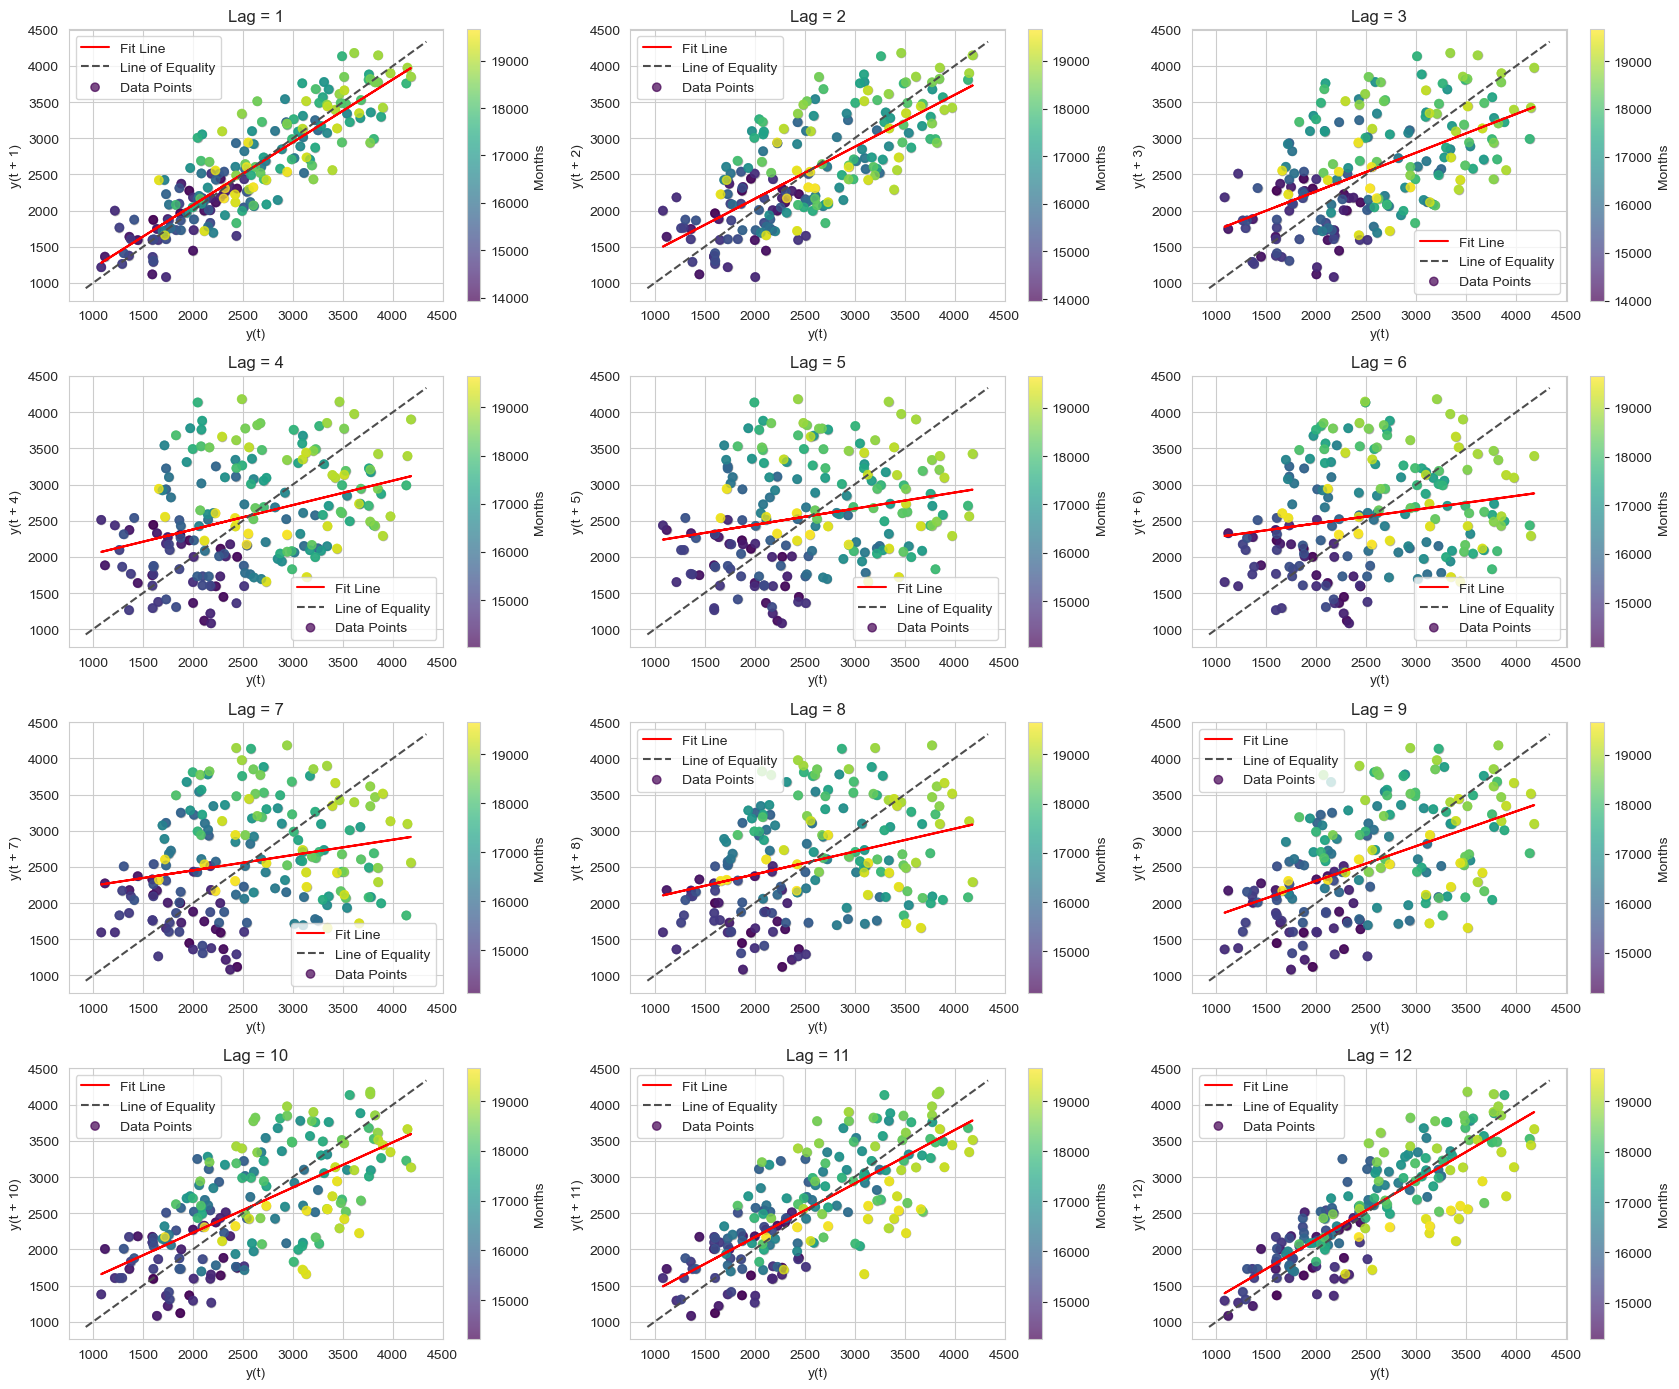

In [14]:
copy2 = data.copy()
# Create a 4x3 subplot grid for lag plots
fig, axes = plt.subplots(4, 3, figsize=(17, 14))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through lags from 1 to 12 and plot lag plots
for lag in range(1, 13):
    ax = axes[lag - 1]
    
    # Plot lag plot
    lag_plot(copy2['zillow_sales'], lag=lag, ax=ax, c='gray', alpha=0.5)
    ax.set_title(f'Lag = {lag}')
    
    # Add fit line (in red color)
    x = copy2['zillow_sales'].shift(lag).dropna()
    y = copy2['zillow_sales'][lag:]
    fit_line = np.polyfit(x, y, 1)
    ax.plot(x, np.polyval(fit_line, x), color='red', label='Fit Line')
    
    # Add line of equality as a dotted line
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", label='Line of Equality')
    
    # Color data points according to months
    ax.scatter(x, y, c=mdates.date2num(copy2['date'][lag:].dt.to_pydatetime()), cmap='viridis', alpha=0.7, label='Data Points')
    
    # Add colorbar
    cbar = plt.colorbar(ax.scatter(x, y, c=mdates.date2num(copy2['date'][lag:].dt.to_pydatetime()), cmap='viridis', alpha=0.7))
    cbar.set_label('Months')

    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

The lag plots for lags 1 to 12 show a strong positive correlation, especially for the initial lags. This is evident from the clustering of data points around the line of equality and the fit line in each subplot. As the lag increases, the correlation seems to weaken slightly but remains positive.

Let us confirm the seasonality pattern by taking lags till 26 (slightly more than 2 years) in ACF and PACF plots.

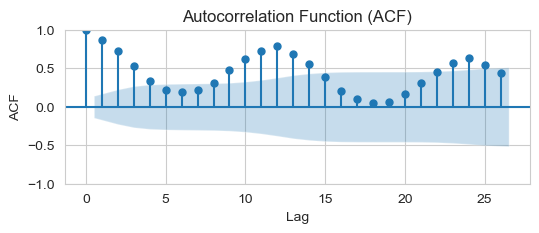

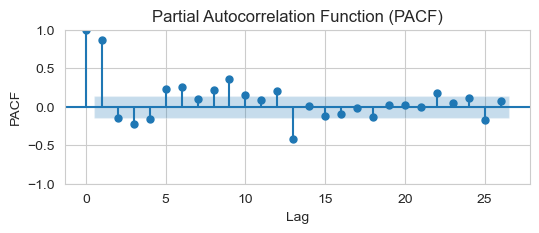

In [15]:
# Assuming 'copy2' is your DataFrame
fig, ax = plt.subplots(figsize=(6, 2))

# Plot ACF
sm.graphics.tsa.plot_acf(copy2.zillow_sales, ax=ax, lags=26)
ax.set(ylim=(-1, 1), xlabel='Lag', ylabel='ACF', title='Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(6, 2))
sm.graphics.tsa.plot_pacf(copy2.zillow_sales, ax=ax, lags=26)
ax.set(ylim=(-1, 1), xlabel='Lag', ylabel='PACF', title='Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

* The ACF plot shows a positive autocorrelation at initial lags, which decreases as the lag increases. This suggests that the time series is not stationary and may have a trend or a seasonal component.
* The PACF plot shows a significant spike at lag 1, suggesting that there might be an autoregressive term of order 1 in the data. This means that the current value of the time series depends on its previous value with some constant coefficient.
* The PACF plot also shows some significant spikes at higher lags, such as 12 and 24. This may indicate some seasonal patterns in the data, where the current value depends on the values at the same time in previous years.
* This confirms the findings from the lag plots, which also showed a high correlation in the 1st and 12th lags. This suggests that the time series is not stationary and may have a trend or a seasonal component.<br><br>
* **We can infer that the pattern repeats a similar trend every 12 months.**

## Section 1.4: SPLITTING OF TIME SERIES DATA

<div style="text-align: justify">Now we shall be fitting various time series models on our time series data for forecasting "zillow_sales" values fir future periods. The forecasted values shall depend on how the time series data is training our time-series models. However, it is always a good idea to test the accuracy of our models before finally using them to forecast future values. Now, we shall be splitting our time-series data into a 80% train set and 20% test set, train our models on the test set, and find their accuracy by calculating their performance metrics like <strong> Root Mean Squared Error (RMSE), Mean Squared Error (MAE), Mean Absolute Percentage Error (MAPE) and Mean Absolute Scaled Error (MASE)</strong> of our time-series models based on their forecasted/predicted values against the actual values in the test period. After finding the best model, we shall be fitting that model on our entire time-series data to forecast our sales values for a reasonable period, let's say 2 years in our case.</div>

Now let us split our time series data into a <strong>80% train & 20% test set</strong> as below:

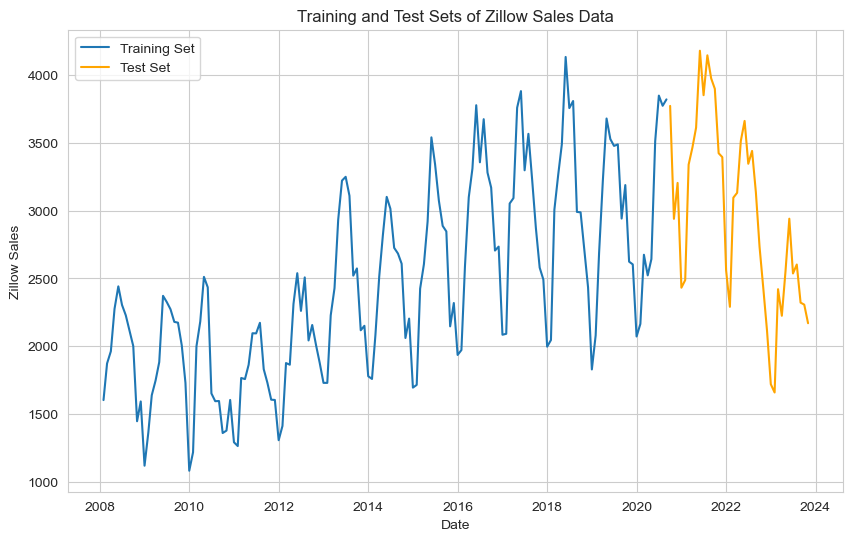

In [16]:
# Load the dataset and parse the 'date' column as datetime
data = pd.read_csv("zillow_sales.csv", parse_dates=['date'])

# Ensure 'date' is in datetime format (this might be redundant if 'parse_dates' is already used)
data['date'] = pd.to_datetime(data['date'])

# Sort the data by date to ensure correct splitting
data.sort_values('date', inplace=True)

# Split the data into 80% train and 20% test sets based on time
split_point = int(len(data) * 0.8)
train = data.iloc[:split_point]
test = data.iloc[split_point:]

# Visualize the training and test sets
plt.figure(figsize=(10, 6))
plt.plot(train['date'], train['zillow_sales'], label='Training Set')
plt.plot(test['date'], test['zillow_sales'], label='Test Set', color='orange')

plt.title('Training and Test Sets of Zillow Sales Data')
plt.xlabel('Date')
plt.ylabel('Zillow Sales')
plt.legend()
plt.show()

## Section 2: ARIMA MODELING

<div style="text-align: justify">In the previous Section we have already split our data into a 80% train and 20% test set. Under this section we shall be using ARIMA (Autoregressive Integrated Moving Average) modeling to find the <strong>best ARIMA Model for our train set.</strong> ARIMA is a statistical method used to analyze and forecast time series data. It combines autoregression(AR), differencing(I), and moving average(MA) components to model complex temporal patterns. However, one of the primary assumptions of ARIMA models is that the underlying time series data is stationary.</div>

### Section 2.1: STATIONARITY ANALYSIS

* <div style="text-align: justify">In a stationary time series data, statistical properties such as mean and variance do not depend on the time at which the series is observed.</div>

* <div style="text-align: justify">However, we have already witnessed an increasing trend of "zillow_sales" in our previous sections in addition to a cylical patterns with spikes in sales every 12 months or a year. This suggested a 12 month seasonality in our data. We shall assume <strong>1 season = 12 months</strong> for our data. Although from the trend lines plotted in <strong>Section 1.2</strong>, we cannot confirm stationarity, as for stationary time series, variation of the 'zillow_sales' should be almost constant with negligible difference.</div>

* Let us use **rolling sd method** to determine if the data is variance stationary or not:

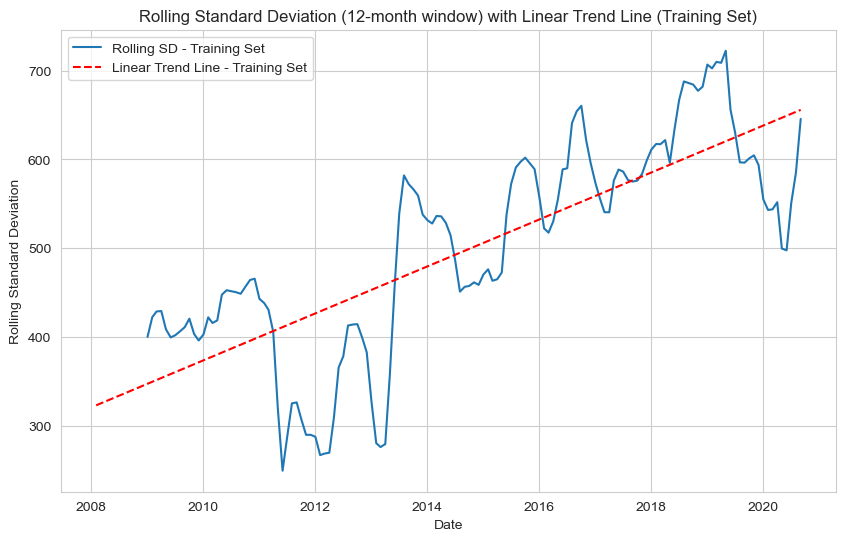

In [17]:
train1 = train.copy()
train2 = train.copy()
train3 = train.copy()
# Set 'date' as the index for the train
train.set_index('date', inplace=True)

# Calculate rolling standard deviation with a specified window size for the training set
window_size = 12  # Adjust as needed
train['rolling_sd'] = train['zillow_sales'].rolling(window=window_size).std()

# Plot the rolling standard deviation for the training set
plt.figure(figsize=(10, 6))
plt.plot(train['rolling_sd'], label='Rolling SD - Training Set')

# Calculate linear fit for the training set, excluding NaN values
valid_indices = ~np.isnan(train['rolling_sd'])
slope, intercept = np.polyfit(pd.to_numeric(train.index[valid_indices]), train['rolling_sd'].dropna(), 1)

# Calculate linear fit for all data points in the training set
linear_fit = slope * pd.to_numeric(train.index) + intercept

plt.plot(train.index, linear_fit, linestyle='--', color='red', label='Linear Trend Line - Training Set')

plt.title(f'Rolling Standard Deviation ({window_size}-month window) with Linear Trend Line (Training Set)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

* From the above plot, we can see that the variance ranges from around 330 - 660, thereby suggesting the data is variance non-stationary.
* To make the variance stationary, we shall transform our time series by using natural log and Box-Cox transformations as plotted below.

<div style="text-align: justify"> <strong>Note:</strong> The below plot shows both the transformations in the same plot. While the Box-Cox transformation too seems to have a seasonality pattern, the same is not immediately visible as the log transformation has been scaled down in comparison to Box-Cox plot. <strong>Click on the zoom button below and crop only the area around the log transformation lines. The plot can be further dragged wround using "pan" button and can be reverted back to its original state using "autoscale" button or simply double clicking on the plot.</strong> We find the same pattern as in Box-Cox.</div>

In [18]:
def plot_transformed_data(transformation_type):
    fig = go.Figure()

    # Create a new column 'boxcox_zillow_sales' with the Box-Cox transformed values
    train1['boxcox_zillow_sales'], lambda_value = boxcox(train1['zillow_sales'])
    train1['log_zillow_sales'] = np.log(train1['zillow_sales'])

    fig.add_trace(go.Scatter(x=train1['date'], y=train1['boxcox_zillow_sales'],
                             mode='lines',
                             name=f'Box-Cox Transformed (lambda={lambda_value:.4f})'))

    fig.add_trace(go.Scatter(x=train1['date'], y=train1['log_zillow_sales'],
                             mode='lines',
                             name='Log Transformed'))

    fig.update_layout(title='Zillow Sales Transformed (Box-Cox and Log)',
                      xaxis_title='Date',
                      yaxis_title='Transformed Zillow Sales',
                      showlegend=True,
                      width=1000,
                      height=700,
                      xaxis_range=[train1['date'].min() - pd.DateOffset(days=365), train1['date'].max() + pd.DateOffset(days=365)])

    fig.show()
# Create an interactive dropdown menu
plot_transformed_data('Both Log and Box-Cox')

* As in the above plot, we can see seasonality, let us use seasonal differencing to remove the seasonal effect. As we have a seasonality of 12 months, we shall use m=12 months or t=12 for conducting seasonal differencing. 
* In general, Box-Cox reduces variance more than log transformation. Although log transformations are simpler, but Box-Cox transformations are more flexible.
* Hence, we shall conduct our ARIMA modeling analysis with the **boxcox transformation.**
* After conducting seasonal differencing, we see no such seasonal pattern as plotted below: 

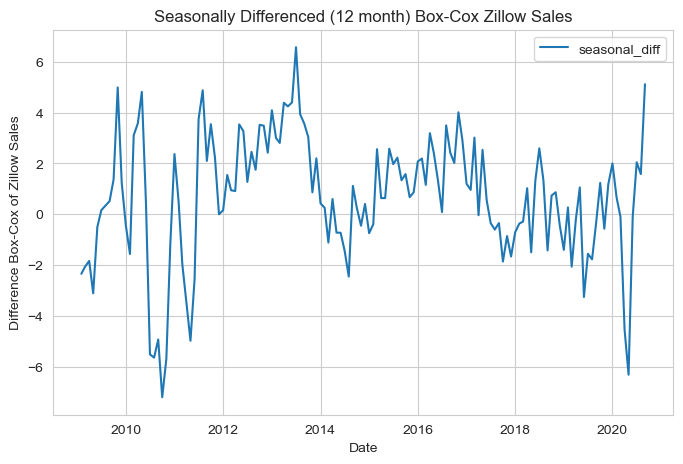

In [19]:
train1['seasonal_diff'] = train1['boxcox_zillow_sales'].diff(12).dropna()

# Display seasonally differenced time series using plotly
plt.figure(figsize=(8, 5))
plt.plot(train1['date'],train1['seasonal_diff'], label='seasonal_diff')
plt.title(f'Seasonally Differenced (12 month) Box-Cox Zillow Sales')
plt.xlabel('Date')
plt.ylabel('Difference Box-Cox of Zillow Sales')
plt.legend()
plt.grid(True)
plt.show()

However, let us confirm mean stationarity after transformation by conducting a KPSS (Kwiatkowski-Phillips-Schmidt-Shin)-test. The KPSS test is commonly used to test for stationarity in time series data. It has two hypotheses:

* **Null hypothesis (H0):** The time series data is stationary around a deterministic trend.
* **Alternative hypothesis (H1):** The time series data has a unit root and is non-stationary.

In [20]:
# Function to perform KPSS test
def kpss_test(series):
    # Drop NaN values before performing the test
    series = series.dropna()
    
    result = kpss(series, regression='c', nlags='auto')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[3])

    # Interpret the result based on the p-value
    if result[1] <= 0.05:
        print("Conclusion: Reject the null hypothesis (non-stationary)")
    else:
        print("Conclusion: Fail to reject the null hypothesis (stationary)")

# Check variance stationarity using KPSS test
print("KPSS Test:")
kpss_test(train1['seasonal_diff'])

KPSS Test:
KPSS Statistic: 0.1817729201910782
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Fail to reject the null hypothesis (stationary)


<div style="text-align: justify"> As we see that p-value (0.1) > 0.05, we shall fail to reject the null hypothesis and conclude that now the time series data is <strong>mean stationary after transformation.</strong> As we got p-value > 0.05, we don't need any further differencing.

## Section 2.2: ACF/PACF Plot Analysis

Let us plot the Autocorrelation Function and Partial Autocorrelation plots of the transformed series as below:

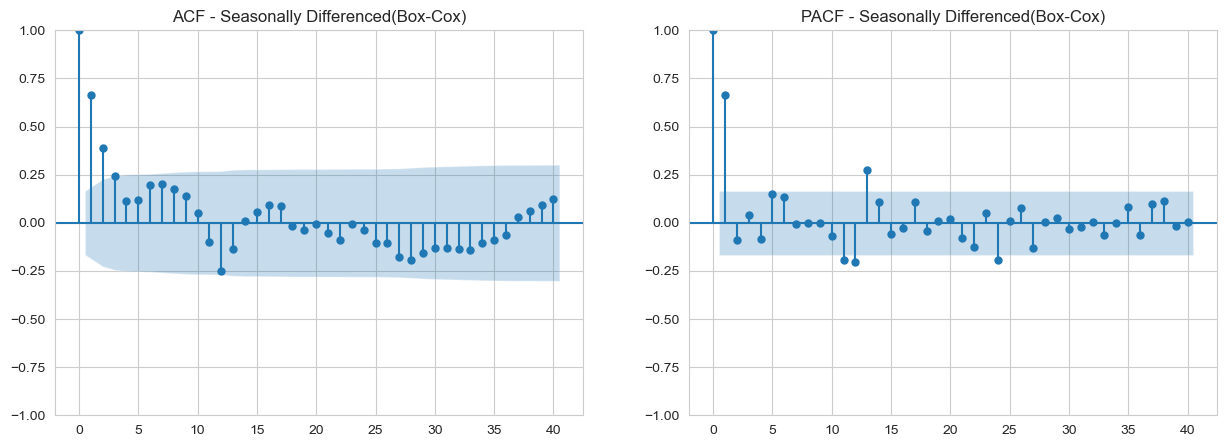

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original series
plot_acf(train1['seasonal_diff'].dropna(), lags=40, ax=axes[0], title='ACF - Seasonally Differenced(Box-Cox)')
plot_pacf(train1['seasonal_diff'].dropna(), lags=40, ax=axes[1], title='PACF - Seasonally Differenced(Box-Cox)')

plt.show()

* Based on the ACF/PACF plots in the attached image, it appears that the time-series might be an autoregressive process. The ACF plot shows a gradual decline, while the PACF plot has a sharp cut-off after lag 1, which is typical of an AR process. The order of the time series might be ARIMA(1,0,0) as there is one significant spike in the PACF plot and no significant spikes in the ACF plot after lag 1.
* However, significant lags can be seen in intervals of 12 lags, which is the seasonal period, indicating we have a seasonal order in our ARIMA model. Hence we have to take D = 1, in the seasonal component of the order. Although after 12 lags, we see one major significant spike in lags, but there are around 3 more lags which are just above the confidence intervals.
* Hence for testing the best fit for ARIMA(p,d,q)(P,D,Q)m, we have m=12(seasonal), p=1, d=q=Q=0, D=1, and lets us test P ={1,2,3,4}

## Section 2.3: ARIMA MODEL COMPARISON

Based on the "best guesses" from ACF/PACF plots, we shall test the following ARIMA models based on their BIC values(sorted in increasing order of BIC values below):

* ARIMA(1,0,0)(0,1,0)[12]
* ARIMA(1,0,0)(1,1,0)[12]
* ARIMA(1,1,0)(0,1,0)[12]
* ARIMA(1,1,0)(1,1,0)[12]
* ARIMA(1,0,0)(2,1,0)[12]
* ARIMA(1,1,0)(2,1,0)[12]
* ARIMA(1,1,1)(1,1,0)[12]
* ARIMA(1,1,1)(2,1,0)[12]
* ARIMA(1,1,1)(3,1,0)[12]
* ARIMA(1,1,1)(4,1,0)[12]

In [22]:
def fit_arima_models(data, orders):
    results_list = []

    for order in orders:
        model = ARIMA(train1['boxcox_zillow_sales'], order=order[:3], seasonal_order=order[3:])
        results = model.fit()

        results_list.append({
            'Order': order,
            'BIC': results.bic,
            'AIC': results.aic
        })

    return pd.DataFrame(results_list)

# Define the orders
orders = [
    (1, 0, 0, 0, 1, 0, 12),
    (1, 0, 0, 1, 1, 0, 12),
    (1, 1, 0, 0, 1, 0, 12),
    (1, 1, 0, 1, 1, 0, 12),
    (1, 0, 0, 2, 1, 0, 12),
    (1, 1, 0, 2, 1, 0, 12),
    (1, 1, 1, 1, 1, 0, 12),
    (1, 1, 1, 2, 1, 0, 12),
    (1, 1, 1, 3, 1, 0, 12),
    (1, 1, 1, 4, 1, 0, 12)
]

# Fit models and store results in a dataframe
results_df = fit_arima_models(train1, orders)

# Sort the dataframe by BIC in increasing order
results_df_sorted = results_df.sort_values(by='BIC')

# Display the sorted dataframe
display(results_df_sorted)

Order         BIC         AIC
9  (1, 1, 1, 4, 1, 0, 12)  549.579515  529.038197
1  (1, 0, 0, 1, 1, 0, 12)  559.974238  551.149310
6  (1, 1, 1, 1, 1, 0, 12)  561.335351  549.597455
8  (1, 1, 1, 3, 1, 0, 12)  561.571341  543.964498
7  (1, 1, 1, 2, 1, 0, 12)  562.246017  547.573647
4  (1, 0, 0, 2, 1, 0, 12)  562.988142  551.221572
3  (1, 1, 0, 1, 1, 0, 12)  568.445002  559.641580
5  (1, 1, 0, 2, 1, 0, 12)  569.619729  557.881834
0  (1, 0, 0, 0, 1, 0, 12)  578.640216  572.756931
2  (1, 1, 0, 0, 1, 0, 12)  594.886259  589.017311

<div style="text-align: justify">From the above models, based on BIC values we get ARIMA(1,0,0)(1,1,0)[12] as our best model with BIC = 559.97. But let us check whats our best model with auto-arima.</div>

In [23]:
# Fit auto ARIMA model with specified D=1
auto_model = auto_arima(train1['boxcox_zillow_sales'], seasonal=True, m=12, suppress_warnings=True,
                        stepwise=False, approximation=False, D=1)

# Get the best order
best_order = auto_model.get_params()['order']
best_seasonal_order = auto_model.get_params()['seasonal_order']

# Extract AIC and BIC
aic_value = auto_model.aic()
bic_value = auto_model.bic()

# Print the best order, AIC, and BIC
print("Best ARIMA Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)
print("AIC:", aic_value)
print("BIC:", bic_value)

Best ARIMA Order: (1, 0, 0)
Best Seasonal Order: (2, 1, 0, 12)
AIC: 549.2634165599882
BIC: 563.9716286730347


* <div style="text-align: justify">Auto-arima shows a best model of ARIMA(1,1,1)(2,1,0)[12], which is different than our manually selected model. However, BIC value of ARIMA(1,1,1)(4,1,0)[12] < ARIMA(1,1,1)(2,1,0)[12]. Therefore let us project our time series data by fitting it with <strong>ARIMA(1,1,1)(4,1,0)[12].</strong></div>
    
* Plotting the derived values from ARIMA(1,1,1)(4,1,0)[12] against our actual values, we get the following plot:

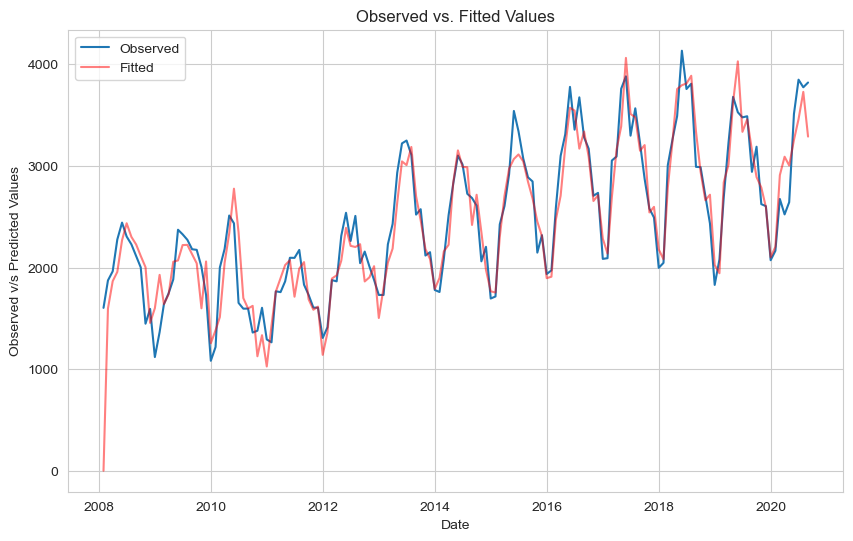

In [24]:
# Fit the best ARIMA model
best_order = (1, 1, 1, 4, 1, 0, 12)  # Replace with your best order
best_model = ARIMA(train1['zillow_sales'].dropna(), order=best_order[:3], seasonal_order=best_order[3:])
best_results = best_model.fit()

# Derive fitted values
fitted_values = best_results.fittedvalues

# Plot observed vs. fitted values
plt.figure(figsize=(10, 6))
plt.plot(train1['date'], train1['zillow_sales'], label='Observed')
plt.plot(train1['date'], fitted_values, label='Fitted', color='r', alpha=0.5)
plt.title('Observed vs. Fitted Values')
plt.xlabel('Date')
plt.ylabel('Observed v/s Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

From the above, we see that the in-sample predicted values from our model almost matches with the observations of the actuactual values. Hence we shall deem ARIMA(1,0,0)(1,1,0)[12] to be best-fit model.

## Section 2.4: RESIDUAL ANALYSIS

After choosing our final model, we shall examine the residuals. The residuals have been plotted below:

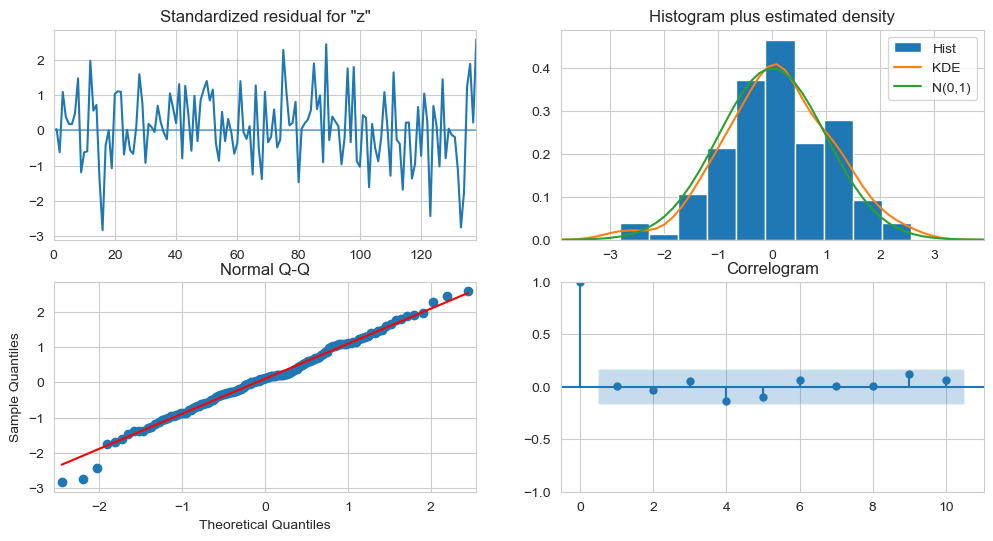

In [25]:
best_results.plot_diagnostics(figsize=(12, 6))
plt.show()

* <div style="text-align: justify">From the residual plots, it can be concluded that the ARIMA model is a good fit for the data. The standardized residual plot shows randomness, indicating no obvious pattern or trend left in the residuals. The Normal Q-Q plot shows that the residuals are normally distributed as they closely follow the theoretical quantile line. The histogram also supports this as it resembles a normal distribution, and the correlogram shows that there is no significant autocorrelation among residuals.</div>

* <div style="text-align: justify">These plots suggest that your ARIMA model has captured most of the temporal dependence in your data and the residuals are random and normally distributed. This is a desirable property for a well-fitted model, as it implies that the model is not overfitting or underfitting the data.</div>

* <div style="text-align: justify">However, for confirming the same let us conduct a <strong>Box-Ljung test</strong> for residual autocorrelation and examine the ACF/PACF plots(separately) in the residuals.The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series. Autocorrelation is the correlation of a variable with itself at different time lags. The Ljung-Box test is used widely in econometrics and other fields in which time series data is common.</div>

* <div style="text-align: justify">For using number of lags in ljung test, we shall use the formula h = min(2m, n/5) for seasonal data, where m is the seasonal period and n is the sample size. For us m=12 and n=190. Thus we should use h=24 or lags = 24 in our case.</div>

Ljung-Box Test Results:


lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    1.176762   0.278016   1.153838   0.282747
2    1.253838   0.534235   1.228912   0.540935
3    3.389760   0.335344   3.295486   0.348271
4    3.842474   0.427744   3.730562   0.443696
5    5.472995   0.360916   5.286968   0.381871
6    5.600202   0.469430   5.407567   0.492698
7    5.671556   0.578580   5.474751   0.602231
8    6.412791   0.601096   6.167854   0.628436
9    7.030517   0.633942   6.741456   0.664017
10   7.269745   0.699758   6.962043   0.729023
11   7.539746   0.753843   7.209252   0.781893
12  12.057657   0.441060  11.316444   0.502012
13  12.232543   0.508674  11.474295   0.571149
14  12.719973   0.548682  11.911084   0.613443
15  12.735682   0.622705  11.925058   0.684693
16  12.839985   0.684420  12.017170   0.742797
17  15.378622   0.568230  14.242598   0.649861
18  15.646129   0.617229  14.475365   0.697619
19  15.811628   0.669807  14.618296   0.746529
20  18.548680   0.551312  16.964340   0.655288
21  18.761872   0.600413  17.145692   0.702238
22  22.411937   0.435543  20.226915   0.568848
23  23.271594   0.445008  20.947017   0.584323
24  24.078610   0.457110  21.617784   0.602068

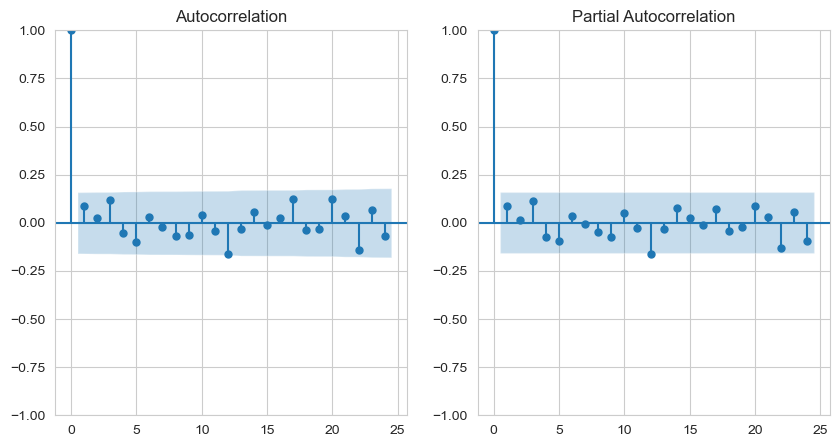

In [26]:
ljungbox_result = acorr_ljungbox(best_results.resid, lags=24, boxpierce=True)

# Print the test results
print("Ljung-Box Test Results:")
display(ljungbox_result)

# Plot the ACF and PACF of the residuals with 24 lags
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_acf(best_results.resid, lags=24, ax=ax[0])
plot_pacf(best_results.resid, lags=24, ax=ax[1])
plt.show()

The Ljung-Box test uses the following hypotheses:

* **H0:** The residuals are independently distributed. There is no autocorrelation in the data.
* **Ha:** The residuals are not independently distributed. There is autocorrelation in the data.<br><br>

* From the ACF and PACF plots and the Ljung-Box Test results, we can conclude that there is no significant autocorrelation in the residuals after fitting the ARIMA model. The p-values are all above 0.05, indicating that we fail to reject the null hypothesis of no autocorrelation at each lag. The ACF and PACF plots also confirm this, as the correlations are within the confidence intervals.

* This means thatyour ARIMA model has captured most of the temporal dependence in your data and the residuals are random and normally distributed. This is a desirable property for a well-fitted model, as it implies that the model is not overfitting or underfitting the data.

Finally, let us create a 6 time-period ( 6 month in our case) forecast for your model from the end of the data. The forecasted values have been tabulated and plotted below:

## Section 3.0: META PROPHET MODEL

<div style="text-align: justify">Facebook Prophet is a procedure for forecasting time series data where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It is designed to be easy and completely automatic.</div><br>

<div style="text-align: justify">We should use it when we have time series data that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data, shifts in the trend, and outliers. It also allows us to incorporate domain knowledge and adjust the forecasts manually.</div>

Some advantages of Prophet over seasonal naive and ARIMA are:

* Prophet can handle complex seasonality patterns that are not easily captured by simple methods like seasonal naive or periodic ARIMA.
* Prophet does not require stationary time series, which means we do not need to apply differencing or transformations to make the data stationary.
* Prophet can incorporate holiday effects and other external regressors that may affect the time series.
* Prophet can provide uncertainty intervals for the forecasts, which can be useful for decision making.

### Section 3.1: DEFAULT PROPHET MODEL

<div style="text-align: justify">Now just like Seasonal Naive and ARIMA, we shall fit a default prophet model to our entire time-series dataset. A default prophet model has the following parameters:</div>
   
* **changepoint_range = 0.80**
* **n_changepoints = 25**
* **changepoint_prior_scale = 0.05.**

14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing


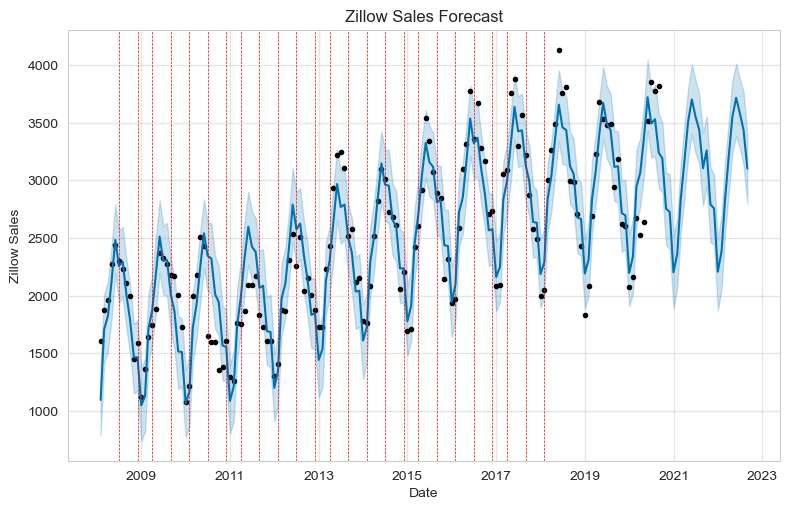

In [27]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore')
# Rename the columns to fit the Prophet model requirements
train2 = train2.rename(columns={'date': 'ds', 'zillow_sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train2)

# Create a train2frame for future predictions
future = model.make_future_dataframe(periods=24, freq='M')

# Use the model to make predictions
forecast = model.predict(future)

# Plot the forecast including the changepoints
fig = model.plot(forecast, figsize=(8, 5))
ax = fig.gca()
changepoints = model.changepoints
for cp in changepoints:
    plt.axvline(cp, c='red', ls='--', lw=0.5)
plt.xlabel('Date')
plt.ylabel('Zillow Sales')
plt.title('Zillow Sales Forecast')
plt.show()

<div style="text-align: justify">By default, prophet model plots historical data points and the forecast in lines (including the trend and uncertainty intervals). For a better clarity of actuals vs predicted lines by prophet, one can refer below plot:</div>

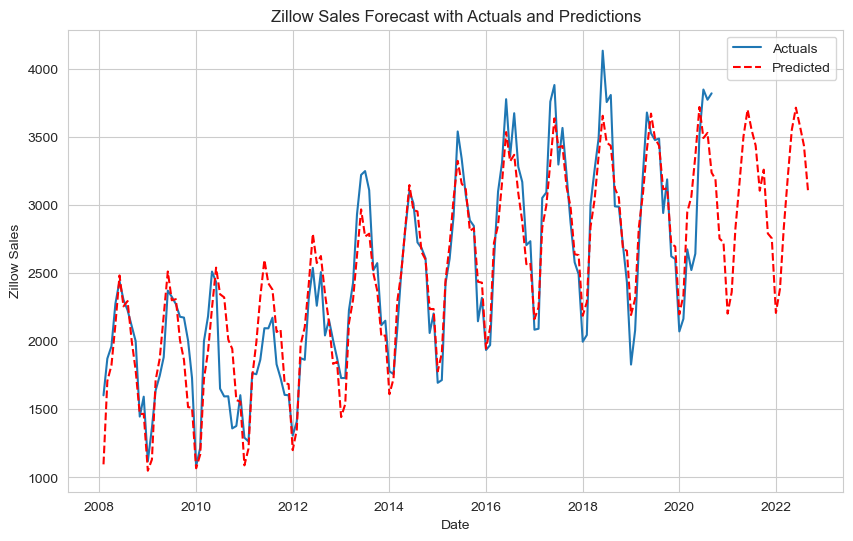

In [28]:
# Plot actual train2
plt.figure(figsize=(10, 6))
plt.plot(train2['ds'], train2['y'], label='Actuals')  # Actuals in black
plt.plot(forecast['ds'], forecast['yhat'], 'r--', label='Predicted')  # Predictions in blue dashed line
plt.xlabel('Date')
plt.ylabel('Zillow Sales')
plt.title('Zillow Sales Forecast with Actuals and Predictions')
plt.legend()
plt.show()

### Section 3.2: PROPHET DECOMPOSITION

<div style="text-align: justify">By <strong>default it fits an additive model with linear growth,</strong> while the seasonality, whether daily or weekly or yearly would automatically be detected in "plot_components" if there more than 2 days/weeks/years of history. Let us decompose and visualize the elements of the time-series as identified by our initial model below:</div>

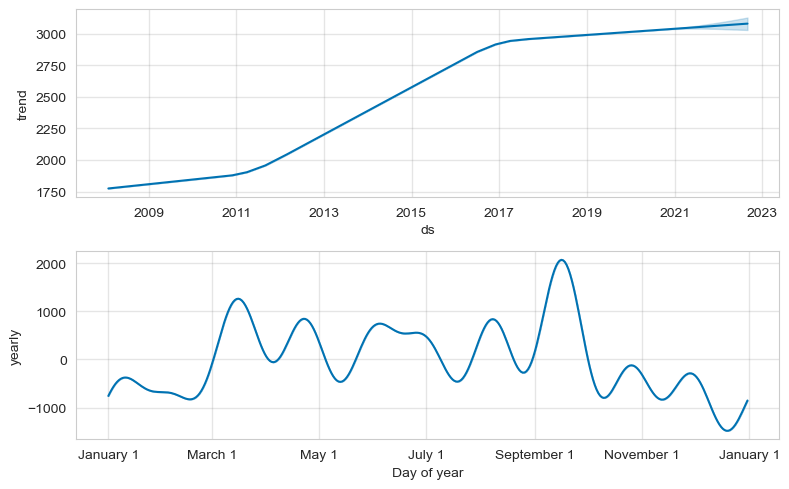

In [29]:
model.plot_components(forecast, figsize=(8, 5))
plt.tight_layout()
plt.show()

<div style="text-align: justify">From the above plot, it is clear that the automated prophet model fitting suggests a <strong>yearly seasonality</strong> as plotted by the "plot_components" and it didn't plot any weekly or daily seasonality. Although the default prophet model seems to reasonably fit well to our actual data as per visual inspection, let us tune our model by changing the hyperparameters as discussed in Section 4.1 as in below mentioned plot with the hyperparameters mentioned in legends of the plot:</div>

In [30]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
# Define different sets of changepoint parameters to compare
param_sets = [
    {'changepoint_range': 0.8, 'n_changepoints': 25, 'changepoint_prior_scale': 0.05},
    {'changepoint_range': 0.8, 'n_changepoints': 25, 'changepoint_prior_scale': 0.1},
    {'changepoint_range': 0.8, 'n_changepoints': 40, 'changepoint_prior_scale': 0.2},
    {'changepoint_range': 0.8, 'n_changepoints': 40, 'changepoint_prior_scale': 0.1},
    {'changepoint_range': 0.8, 'n_changepoints': 10, 'changepoint_prior_scale': 0.2},
    {'changepoint_range': 0.8, 'n_changepoints': 10, 'changepoint_prior_scale': 0.1},
    {'changepoint_range': 0.7, 'n_changepoints': 40, 'changepoint_prior_scale': 0.1},
    {'changepoint_range': 0.7, 'n_changepoints': 40, 'changepoint_prior_scale': 0.2},
    {'changepoint_range': 0.7, 'n_changepoints': 10, 'changepoint_prior_scale': 0.1},
    {'changepoint_range': 0.7, 'n_changepoints': 10, 'changepoint_prior_scale': 0.2},
    {'changepoint_range': 0.9, 'n_changepoints': 40, 'changepoint_prior_scale': 0.1},
    {'changepoint_range': 0.9, 'n_changepoints': 40, 'changepoint_prior_scale': 0.2},
    {'changepoint_range': 0.9, 'n_changepoints': 10, 'changepoint_prior_scale': 0.1},
    {'changepoint_range': 0.9, 'n_changepoints': 10, 'changepoint_prior_scale': 0.2},
    {'changepoint_range': 0.7, 'n_changepoints': 10, 'changepoint_prior_scale': 0.2},
    {'changepoint_range': 0.8, 'n_changepoints': 3, 'changepoint_prior_scale': 0.2}
]

# Initialize a figure for plotting using plotly
fig = go.Figure()

# Plot the actual train2
fig.add_trace(go.Scatter(x=train2['ds'], y=train2['y'], mode='markers', name='Actuals'))

for params in param_sets:
    # Initialize and fit the Prophet model with the set of parameters
    model = Prophet(
        changepoint_range=params['changepoint_range'],
        n_changepoints=params['n_changepoints'],
        changepoint_prior_scale=params['changepoint_prior_scale']
    )
    model.fit(train2)

    # Create a train2frame for future predictions
    future = model.make_future_dataframe(periods=24, freq='M')  # adjust periods as needed

    # Use the model to make predictions
    forecast = model.predict(future)

    # Plot the forecasted trend line
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name=f"Trend {params}"))

# Additional plot customizations with legend positioned below the plot
fig.update_layout(
    title='Zillow Sales Forecast with Different Changepoint Parameters',
    xaxis_title='Date',
    yaxis_title='Zillow Sales',
    legend_title='Legend',
    legend=dict(
        y=-0.05,
        x=0.5,
        xanchor='center',
        yanchor='top',
        orientation='h'
    ),
    margin=dict(b=100),  # Adjust the bottom margin to prevent cutting off the legend
    width=1000,  # Width of the plot in pixels
    height=800
)
# Show the interactive plot
fig.show()

<div style="text-align: justify">In the above plot, one can single click on all the legends one by one to deactivate the forecasted lined plotted by prophet models, and can manually check visually which parameters fit better. From domain knowledge we can assess that although increasing "changepoint_range" to 0.9 increases our range of data for the train period, our sales value are being forecasted to plummet by a huge extend looking at the way actual trend in which our sales values decresed during the COVID pandemic period. The trend of yearly sales still decresed even during the years when COVID norms were relaxed. But it is to be noted that even if COVID norms were relaxed, the market is still under recovery stage. Once it has stabilized we may expect an increase or atleast plateau-ing of our yearly sales.</div><br>

<div style="text-align: justify">Considering the above, <strong>changepoint_range=0.7, n_changepoints=10, changepoint_prior_scale=0.2</strong> best fits our data.
We have increased changepoint_prior_scale from 0.05 to 0.2 for our model to be more flexible, changepoint_range to 0.7 to imply that the first 70% of our time series data show the actual trend rather than 90% of the data(wherein in 90% of our data, we witnessed a global market shock), and reduced_changepoints to 10 as there are not much changes in trend throughout our time-series data.</div>

### Section 3.3: LINEAR VS LOGISTIC GROWTH

<div style="text-align: justify">As in our real data, it seems that our sales have reached a saturating point and then reduced drastically, although its due to a global shock, we may expect sales to rise further, once our market has recovered. In case if it still plummets, the sales can't decrease beyond zero. Hence we shall set our <strong>floor at 0</strong> and let us set our cap around 2000 higher than our highest even sales which seems to be around 4200-4200. Hence we shall set our <strong>cap at 6000</strong>. Now let us observe the plots below:</div>

In [31]:
# Prepare the train2frame for logistic growth
train2_logistic = train2.copy()
train2_logistic['cap'] = 6000
train2_logistic['floor'] = 0

# Initialize two Prophet models: one with linear and another with logistic growth
model_linear = Prophet(growth='linear')
model_logistic = Prophet(growth='logistic')

# Fit the models
model_linear.fit(train2)
model_logistic.fit(train2_logistic)

# Create future train2frames for predictions
future_linear = model_linear.make_future_dataframe(periods=24, freq='M')
future_logistic = model_logistic.make_future_dataframe(periods=24, freq='M')

# Specify the capacity (cap) and floor for the future train2frame in logistic model
future_logistic['cap'] = 6000
future_logistic['floor'] = 0

# Predict
forecast_linear = model_linear.predict(future_linear)
forecast_logistic = model_logistic.predict(future_logistic)

# Initialize a figure for plotting using plotly
fig = go.Figure()

# Add the actual train2
fig.add_trace(go.Scatter(x=train2['ds'], y=train2['y'], mode='markers', name='Actuals'))

# Add the linear forecast
fig.add_trace(go.Scatter(x=forecast_linear['ds'], y=forecast_linear['yhat'], mode='lines', name='Linear Growth Forecast'))

# Add the logistic forecast
fig.add_trace(go.Scatter(x=forecast_logistic['ds'], y=forecast_logistic['yhat'], mode='lines', name='Logistic Growth Forecast'))

# Additional plot customizations
fig.update_layout(
    title='Zillow Sales Forecast: Linear vs Logistic Growth',
    xaxis_title='Date',
    yaxis_title='Zillow Sales',
    legend_title='Legend',
    legend=dict(
        y=-0.3,
        x=0.5,
        xanchor='center',
        yanchor='top',
        orientation='h'
    ),
    margin=dict(b=100),
    width=1000,
    height=600
)
# Show the interactive plot
fig.show()

<div style="text-align: justify">Although on visual inspection, it seems as if the linear growth model fits more closely to the actual values than the model with multiplicative growth, we can assess the same during cross validation as described in <strong>Section 4.4</strong> below. In cross-validation we shall assess performance metrics like RSME, MAE and MAPE accross a rolling windows at meaningful thresholds with changed hyperparameters.</div>

### Section 3.4: SEASONALITY IDENTIFICATION

Our Prophet Model can handle both Additive and Multiplicative Seasonality.
* **Additive Seasonality** is appropriate if the seasonal effect is roughly constant throughout the series.
* **Multiplicative Seasonality** is appropriate if the seasonal effect increases proportionally with the level of the time series.

Let us fit our model as per both additive and multiplicative seasonality in below plot:

In [32]:
# Initialize two Prophet models with different seasonality modes
model_additive = Prophet(seasonality_mode='additive')
model_multiplicative = Prophet(seasonality_mode='multiplicative')

# Fit the models
model_additive.fit(train2)
model_multiplicative.fit(train2)

# Create future train2frames for predictions
future_additive = model_additive.make_future_dataframe(periods=24, freq='M')
future_multiplicative = model_multiplicative.make_future_dataframe(periods=24, freq='M')

# Predict
forecast_additive = model_additive.predict(future_additive)
forecast_multiplicative = model_multiplicative.predict(future_multiplicative)

# Initialize a figure for plotting using plotly
fig = go.Figure()

# Add the actual train2
fig.add_trace(go.Scatter(x=train2['ds'], y=train2['y'], mode='markers', name='Actuals'))

# Add the additive forecast
fig.add_trace(go.Scatter(x=forecast_additive['ds'], y=forecast_additive['yhat'], mode='lines', name='Additive Forecast'))

# Add the multiplicative forecast
fig.add_trace(go.Scatter(x=forecast_multiplicative['ds'], y=forecast_multiplicative['yhat'], mode='lines', name='Multiplicative Forecast'))

# Additional plot customizations
fig.update_layout(
    title='Zillow Sales Forecast: Additive vs Multiplicative Seasonality',
    xaxis_title='Date',
    yaxis_title='Zillow Sales',
    legend_title='Legend',
    legend=dict(
        y=-0.3,
        x=0.5,
        xanchor='center',
        yanchor='top',
        orientation='h'
    ),
    margin=dict(b=100),
    width=1000,
    height=600
)

# Show the interactive plot
fig.show()

<div style="text-align: justify">Based on the above plot, it appears that the time series exhibits a more consistent pattern with the multiplicative seasonality forecast. The multiplicative forecast line is closer to the actual data points throughout the series. The additive forecast does not seem to track the actual data as closely and shows a tendency to overestimate peaks and underestimate troughs, especially in the later years where the distance between forecasted values and actuals increases.</div><br>

<div style="text-align: justify">Therefore, the conclusion from the visual inspection of this plot is that a multiplicative seasonality model seems to better fit the Zillow Sales time series data. However we can assess the same after cross validating in <strong>Section 3.6</strong>.</div>

### Section 3.5: HOLIDAY'S IMPACT

As this is a monthly time-series data, we don’t need to examine and include holidays into the model.

<div style="text-align: justify">From visual inspection, it seems that the Default Linear Growth Prophet Model Multiplicative Seasonality best fits our time series data. However we shall cross check several models during Cross Validation in <strong>Section 4.4.</strong></div>

### Section 3.6: BEST PROPHET MODEL

<div style="text-align: justify">Since it is difficult to infer which among the prophet models would perform better, let us compare the performance metrics of various prophet models as below:</div>

In [33]:
data = data.rename(columns={'date': 'ds', 'zillow_sales': 'y'})
# Calculate the index for splitting into training and test sets
train_size = int(len(data) * 0.8)

# Split data into training and test sets
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Prepare additional dataframe for logistic growth
data_logistic = train_data.copy()
data_logistic['cap'] = 6000
data_logistic['floor'] = 0

# Initialize Prophet models with different configurations
linear_additive_default = Prophet(growth='linear', seasonality_mode='additive')
logistic_additive_default = Prophet(growth='logistic', seasonality_mode='additive')
linear_additive_tuned = Prophet(growth='linear', seasonality_mode='additive', changepoint_range=0.70, n_changepoints=10, changepoint_prior_scale=0.2)
logistic_additive_tuned = Prophet(growth='logistic', seasonality_mode='additive', changepoint_range=0.70, n_changepoints=10, changepoint_prior_scale=0.2)
linear_multiplicative_default = Prophet(growth='linear', seasonality_mode='multiplicative')
logistic_multiplicative_default = Prophet(growth='logistic', seasonality_mode='multiplicative')
linear_multiplicative_tuned = Prophet(growth='linear', seasonality_mode='multiplicative', changepoint_range=0.70, n_changepoints=10, changepoint_prior_scale=0.2)
logistic_multiplicative_tuned = Prophet(growth='linear', seasonality_mode='multiplicative', changepoint_range=0.70, n_changepoints=10, changepoint_prior_scale=0.2)

# Fit the models
linear_additive_default.fit(train_data)
logistic_additive_default.fit(data_logistic)
linear_additive_tuned.fit(train_data)
logistic_additive_tuned.fit(data_logistic)
linear_multiplicative_default.fit(train_data)
logistic_multiplicative_default.fit(data_logistic)
linear_multiplicative_tuned.fit(train_data)
logistic_multiplicative_tuned.fit(data_logistic)

# Conduct cross-validation with rolling window
df_cv_linear_additive_default = cross_validation(linear_additive_default, initial='1825 days', period='180 days', horizon='365 days')
df_cv_logistic_additive_default = cross_validation(logistic_additive_default, initial='1825 days', period='180 days', horizon='365 days')
df_cv_linear_additive_tuned = cross_validation(linear_additive_tuned, initial='1825 days', period='180 days', horizon='365 days')
df_cv_logistic_additive_tuned = cross_validation(logistic_additive_tuned, initial='1825 days', period='180 days', horizon='365 days')
df_cv_linear_multiplicative_default = cross_validation(linear_multiplicative_default, initial='1825 days', period='180 days', horizon='365 days')
df_cv_logistic_multiplicative_default = cross_validation(logistic_multiplicative_default, initial='1825 days', period='180 days', horizon='365 days')
df_cv_linear_multiplicative_tuned = cross_validation(linear_multiplicative_tuned, initial='1825 days', period='180 days', horizon='365 days')
df_cv_logistic_multiplicative_tuned = cross_validation(logistic_multiplicative_tuned, initial='1825 days', period='180 days', horizon='365 days')

# Calculate performance metrics for all models
df_p_linear_additive_default = performance_metrics(df_cv_linear_additive_default)
df_p_logistic_additive_default = performance_metrics(df_cv_logistic_additive_default)
df_p_linear_additive_tuned = performance_metrics(df_cv_linear_additive_tuned)
df_p_logistic_additive_tuned = performance_metrics(df_cv_logistic_additive_tuned)
df_p_linear_multiplicative_default = performance_metrics(df_cv_linear_multiplicative_default)
df_p_logistic_multiplicative_default = performance_metrics(df_cv_logistic_multiplicative_default)
df_p_linear_multiplicative_tuned = performance_metrics(df_cv_linear_multiplicative_tuned)
df_p_logistic_multiplicative_tuned = performance_metrics(df_cv_logistic_multiplicative_tuned)

# Create a DataFrame with performance metrics for all models
metrics_df = pd.DataFrame({
    'Model': [
        'Linear Additive Default', 'Logistic Additive Default',
        'Linear Additive Tuned', 'Logistic Additive Tuned',
        'Linear Multiplicative Default', 'Logistic Multiplicative Default',
        'Linear Multiplicative Tuned', 'Linear Multiplicative Tuned'
    ],
    'Average RMSE': [
        df_p_linear_additive_default['rmse'].mean(),df_p_logistic_additive_default['rmse'].mean(),
        df_p_linear_additive_tuned['rmse'].mean(),df_p_logistic_additive_tuned['rmse'].mean(),
        df_p_linear_multiplicative_default['rmse'].mean(),df_p_logistic_multiplicative_default['rmse'].mean(),
        df_p_linear_multiplicative_tuned['rmse'].mean(),df_p_logistic_multiplicative_tuned['rmse'].mean()
    ],
    'Average MAE': [
        df_p_linear_additive_default['mae'].mean(),df_p_logistic_additive_default['mae'].mean(),
        df_p_linear_additive_tuned['mae'].mean(),df_p_logistic_additive_tuned['mae'].mean(),
        df_p_linear_multiplicative_default['mae'].mean(),df_p_logistic_multiplicative_default['mae'].mean(),
        df_p_linear_multiplicative_tuned['mae'].mean(),df_p_logistic_multiplicative_tuned['mae'].mean()
    ],
    'Average MAPE': [
        df_p_linear_additive_default['mape'].mean(),df_p_logistic_additive_default['mape'].mean(),
        df_p_linear_additive_tuned['mape'].mean(),df_p_logistic_additive_tuned['mape'].mean(),
        df_p_linear_multiplicative_default['mape'].mean(),df_p_logistic_multiplicative_default['mape'].mean(),
        df_p_linear_multiplicative_tuned['mape'].mean(),df_p_logistic_multiplicative_tuned['mape'].mean()
    ]
})
# Display the DataFrame
display(metrics_df)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Model  Average RMSE  Average MAE  Average MAPE
0          Linear Additive Default    323.937972   269.374012      0.106482
1        Logistic Additive Default    332.266946   270.578838      0.099374
2            Linear Additive Tuned    336.594303   285.058771      0.111550
3          Logistic Additive Tuned    336.742603   283.121368      0.112908
4    Linear Multiplicative Default    285.903144   230.851842      0.085734
5  Logistic Multiplicative Default    300.030860   228.041636      0.082568
6      Linear Multiplicative Tuned    308.204332   249.277161      0.092879
7      Linear Multiplicative Tuned    308.204332   249.277161      0.092879

<div style="text-align: justify">From the above, it seems as if the Default Linear and Logistic Prophet Models with Multiplicative Seasonality(for both) best fit our data. Although the RSME of Linear Growth model is the lowest, but MAE and MAPE of the Logistic Growth Model are the lowest with its RSME as second lowest. Hence these two models shall be our top models based on Rolling Window Cross Validation in Train Set. Let us visualize these performance metrics (RSME, MAE and MAPE) of our above mentined 8 models in below plots:</div>

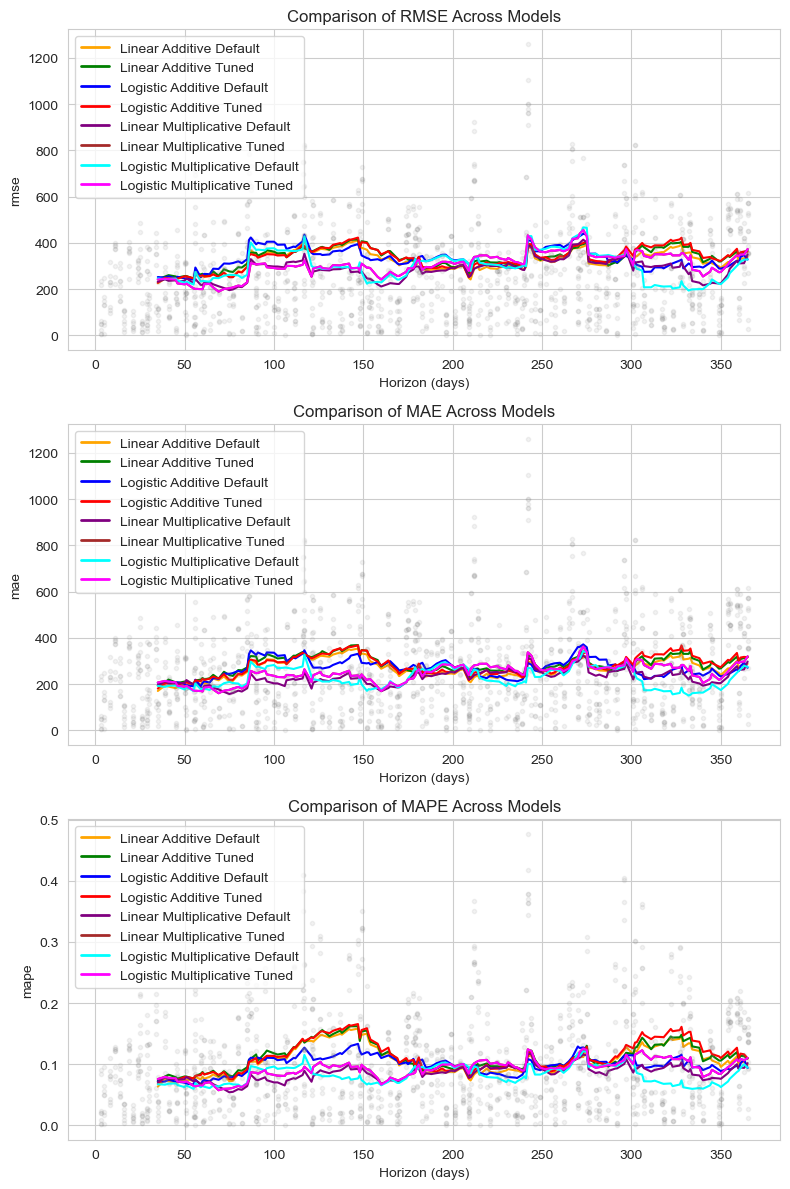

In [34]:
# Custom legend handles adjusted for all model configurations
legend_handles = [
    Line2D([0], [0], color='orange', lw=2, label='Linear Additive Default'),
    Line2D([0], [0], color='green', lw=2, label='Linear Additive Tuned'),
    Line2D([0], [0], color='blue', lw=2, label='Logistic Additive Default'),
    Line2D([0], [0], color='red', lw=2, label='Logistic Additive Tuned'),
    Line2D([0], [0], color='purple', lw=2, label='Linear Multiplicative Default'),
    Line2D([0], [0], color='brown', lw=2, label='Linear Multiplicative Tuned'),
    Line2D([0], [0], color='cyan', lw=2, label='Logistic Multiplicative Default'),
    Line2D([0], [0], color='magenta', lw=2, label='Logistic Multiplicative Tuned')
]

metrics = ['rmse', 'mae', 'mape']
colors = ['orange', 'green', 'blue', 'red', 'purple', 'brown', 'cyan', 'magenta']
dfs_cv = [
    df_cv_linear_additive_default, df_cv_linear_additive_tuned,
    df_cv_logistic_additive_default, df_cv_logistic_additive_tuned,
    df_cv_linear_multiplicative_default, df_cv_linear_multiplicative_tuned,
    df_cv_logistic_multiplicative_default, df_cv_logistic_multiplicative_tuned
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(8, 12))

for i, metric in enumerate(metrics):
    ax = axes[i]
    for df_cv, color in zip(dfs_cv, colors):
        # Assuming your function can accept these arguments, if not adjust accordingly
        plot_cross_validation_metric(df_cv, metric=metric, ax=ax, color=color)
    ax.set_title(f'Comparison of {metric.upper()} Across Models')
    # Assuming legend_handles is correct and correlates with your dfs_cv and colors
    ax.legend(handles=legend_handles)

plt.tight_layout()
plt.show()

<div style="text-align: justify">From the tables and graphs plotted above we shall select the Default Linear and Logistic Models with Multiplicative Seasonality as the best models. However let us finalize which among these two fits our time series data better as below:</div>

In [35]:
df = pd.read_csv('zillow_sales.csv', parse_dates=['date'])
df = df.rename(columns={'date': 'ds', 'zillow_sales': 'y'})
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# Prepare the test set for comparison (keep only the 'ds' column)
test_ds = test_df.drop(columns=['y'])

# 1) Linear Multiplicative Default
linear_multiplicative_model = Prophet(seasonality_mode='multiplicative')
linear_multiplicative_model.fit(train_df)

# Predict on the test set
linear_multiplicative_forecast = linear_multiplicative_model.predict(test_ds)

# 2) Logistic Multiplicative Default
# Add cap and floor
train_df_logistic = train_df.copy()
train_df_logistic['cap'] = 6000
train_df_logistic['floor'] = 0

logistic_multiplicative_model = Prophet(growth='logistic', seasonality_mode='multiplicative')
logistic_multiplicative_model.fit(train_df_logistic)

# Prepare the test set with cap and floor
test_ds_logistic = test_ds.copy()
test_ds_logistic['cap'] = 6000
test_ds_logistic['floor'] = 0

# Predict on the test set
logistic_multiplicative_forecast = logistic_multiplicative_model.predict(test_ds_logistic)

# Performance metrics calculation
def calculate_performance_metrics(test_df, forecast):
    rmse = np.sqrt(mean_squared_error(test_df['y'], forecast['yhat']))
    mae = mean_absolute_error(test_df['y'], forecast['yhat'])
    mape = mean_absolute_percentage_error(test_df['y'], forecast['yhat']) * 100
    return rmse, mae, mape

# Calculate metrics for Linear Multiplicative
linear_multiplicative_metrics = calculate_performance_metrics(test_df, linear_multiplicative_forecast)

# Calculate metrics for Logistic Multiplicative
logistic_multiplicative_metrics = calculate_performance_metrics(test_df, logistic_multiplicative_forecast)

# Print metrics
print("Linear Multiplicative Default Metrics: RMSE:", linear_multiplicative_metrics[0], "MAE:", linear_multiplicative_metrics[1], "MAPE:", linear_multiplicative_metrics[2])
print("Logistic Multiplicative Default Metrics: RMSE:", logistic_multiplicative_metrics[0], "MAE:", logistic_multiplicative_metrics[1], "MAPE:", logistic_multiplicative_metrics[2])

Linear Multiplicative Default Metrics: RMSE: 575.7564448716953 MAE: 494.1779002419638 MAPE: 17.78962169613922
Logistic Multiplicative Default Metrics: RMSE: 812.2708948518298 MAE: 644.5846660878645 MAPE: 24.76847456850294


<div style="text-align: justify">From the above it is clear that the <strong>Default Linear Growth Prophet Model</strong> fits better than the Default Logistic Growth Prophet Model (both models with Multiplicative Seasonality). Therefore for comparison of various time-series models, we shall select <strong>Default Linear Growth Prophet Model</strong> among our Prophet Models to be compared with other models in the Model Comparison and Validation Section below.</div>

## SECTION 4.0: MODEL COMPARISON & VALIDATION

<div style="text-align: justify">To evaluate and compare the effectiveness of the chosen ARIMA and Prophet models with a simple baseline model, cross-validation on the time series data is necessary.We shall also be comparing a Naive, Naive with Drift and Seasonal Naive (owing to 12 month seasonality as observed) along with the best ARIMA (SARIMA) and the best Prophet Model (Linear Growth Multiplicative Seasonality with default hyperparameters) in this section.Model comparison involves comparing the performance of different models on a common set of evaluation metrics such RMSE, MAPE, etc, while model validation involves evaluating the performance of a chosen model on new, unseen (test) data to assess its ability to generalize. This crucial for ensuring that a model is accurate, reliable, and useful for making predictions.</div> 

### Section 4.1: ROLLING WINDOW SETUP

<div style="text-align: justify">For our purpose, we shall be using <strong>Rolling Windows</strong> for validation. We would take <strong>initial training period = 60 months</strong> and <strong>fixed rolling step = 6 months</strong> considering our 16 years(approx) of time series data.</div>

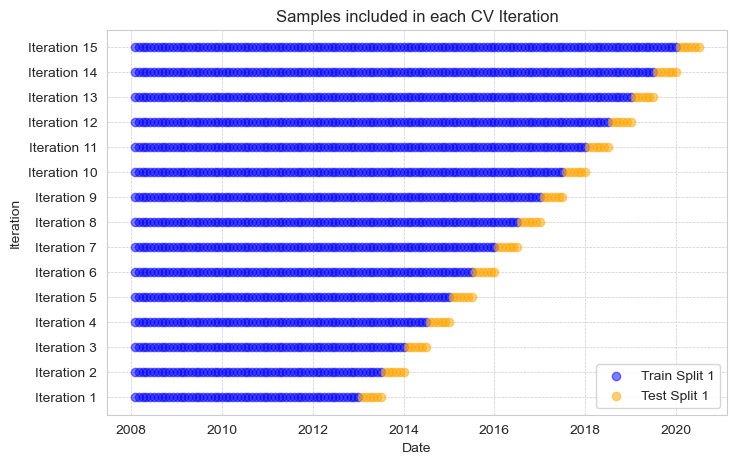

In [36]:
data = pd.read_csv("zillow_sales.csv", parse_dates=['date'])
data['date'] = pd.to_datetime(data['date'])

# Assuming the data is already sorted by date, split the dataset into training and test sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

train = data[:split_index]
test = data[split_index:]
# Update the rolling window parameters based on the new requirements
initial_training_period = 5 * 12  # Initial training period of 5 years (in months)
rolling_step = 6  # Roll the window every 6 months
n_splits = (len(train) - initial_training_period) // rolling_step

# Recompute the rolling_indices with the updated setup
rolling_indices = []

for split in range(n_splits):
    start_train = 0
    end_train = initial_training_period + split * rolling_step
    start_test = end_train
    end_test = end_train + rolling_step  # Rolling window of 1 year
    
    # Ensure we don't go beyond the dataset's length
    if end_test > len(train):
        break
    
    rolling_indices.append((range(start_train, end_train), range(start_test, min(end_test, len(train)))))

# Now, visualize the rolling window splits
fig, ax = plt.subplots(figsize=(8, 5))

# For each split, plot the training and test indices
for i, (train_indices, test_indices) in enumerate(rolling_indices):
    # Convert indices to timestamps for plotting
    train_times = data['date'].iloc[list(train_indices)].values
    test_times = data['date'].iloc[list(test_indices)].values
    
    # Plot training indices
    ax.scatter(train_times, [i] * len(train_indices), label=f'Train Split {i+1}' if i == 0 else "", color='blue', alpha=0.5)
    
    # Plot test indices
    ax.scatter(test_times, [i] * len(test_indices), label=f'Test Split {i+1}' if i == 0 else "", color='orange', alpha=0.5)

# Enhance plot
ax.set_xlabel('Date')
ax.set_ylabel('Iteration')
ax.set_title('Samples included in each CV Iteration')
ax.legend()
plt.yticks(range(n_splits), labels=[f"Iteration {i+1}" for i in range(n_splits)])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

<div style="text-align: justify">The visualization above illustrates the samples included in each cross-validation iteration for the updated rolling window setup, with an initial training period of 5 years and a rolling window of 1 year. Each point represents a month included in the dataset, with blue points indicating the training months and orange points marking the testing months for each iteration. The iterations are labeled along the y-axis, providing a clear view of how the training and testing sets evolve over time.<div><br>
<div style="text-align: justify">This approach allows us to see at a glance how the model will be trained and tested on different segments of the data, ensuring that the training set grows incrementally with each iteration and that the model is evaluated on unseen data, thereby simulating a realistic forecasting scenario.<div><br>
<div style="text-align: justify">Now let us fit the below mentioned models on the 15 iterations created above. For each iteration, we would fit out models on the train set and make predictions for test set. Below are our models which we would test:<div>
    
* **Naive Model**
* **Naive with Drift Model**
* **Seasonal Naive Model**
* **ARIMA(1,1,1)(4,1,0)[12] Model**    
* **Linear Multiplicative Prophet Model**(with default hyperparameters)   

In [37]:
# Function to fit Seasonal Naive model
def seasonal_naive(train_series, len_test, seasonality=12):
    return np.tile(train_series[-seasonality:], int(np.ceil(len_test/seasonality)))[:len_test]

# New function for Naive Forecast
def naive_forecast(train_series, len_test):
    # Returns the last observed value as the forecast for all future points
    last_observation = train_series.iloc[-1]
    return np.full(len_test, last_observation)

# New function for Naive Forecast with Drift
def naive_forecast_with_drift(train_series, len_test):
    # Calculate the drift from the first to the last observation in the training set
    drift = (train_series.iloc[-1] - train_series.iloc[0]) / (len(train_series) - 1)
    # Generate forecasts by applying the drift to the last observation
    forecasts = [train_series.iloc[-1] + drift * i for i in range(1, len_test + 1)]
    return np.array(forecasts)

# Initialize figure with dropdowns
fig = go.Figure()

# List to store buttons for the dropdown
buttons = []

# Counter for loop iterations to name the traces and buttons
iteration = 1
total_iterations = len(rolling_indices)

# Loop through each rolling window
for train_indices, test_indices in rolling_indices:
    train_series = data.iloc[train_indices].reset_index()
    test_series = data.iloc[test_indices].reset_index()
    
    # Prepare data for Prophet, ensuring 'ds' and 'y' columns
    train_series_for_prophet = train_series[['date', 'zillow_sales']].rename(columns={'date': 'ds', 'zillow_sales': 'y'})
    
    # Generate Naive and Naive with Drift forecasts
    naive_forecast_values = naive_forecast(train_series['zillow_sales'], len(test_series))
    naive_drift_forecast_values = naive_forecast_with_drift(train_series['zillow_sales'], len(test_series))
 
    # Seasonal Naive Forecast for both training and testing periods
    naive_forecast_length = len(train_series) + len(test_series)  # Total length for both train and test
    full_naive_forecast = seasonal_naive(train_series['zillow_sales'], naive_forecast_length, seasonality=12)
    naive_forecast_train = full_naive_forecast[:len(train_series)]
    naive_forecast_test = full_naive_forecast[-len(test_series):]
    
    # SARIMA Forecast
    sarima_model = SARIMAX(train_series.set_index('date')['zillow_sales'], order=(1, 1, 1), seasonal_order=(2, 1, 0, 12)).fit(disp=False)
    sarima_forecast = sarima_model.get_forecast(steps=len(test_series))
    sarima_insample = sarima_model.predict(start=0, end=len(train_series)-1)

    # Prophet Linear Multiplicative
    prophet_linear_model = Prophet(seasonality_mode='multiplicative')
    prophet_linear_model.fit(train_series_for_prophet)
    future_linear = prophet_linear_model.make_future_dataframe(periods=len(test_series), freq='M')
    future_linear['ds'] += timedelta(days=1)
    forecast_linear_df = prophet_linear_model.predict(future_linear)
    forecast_linear_df_test = forecast_linear_df[forecast_linear_df['ds'].isin(test_series['date'])]
    
    # Add traces for each forecast model, including Seasonal Naive for training period
    fig.add_trace(go.Scatter(x=train_series['date'], y=train_series['zillow_sales'], name=f'Train {iteration}', visible=(iteration==1)))
    fig.add_trace(go.Scatter(x=test_series['date'], y=test_series['zillow_sales'], mode='lines', name=f'Test {iteration}', visible=(iteration==1)))
    fig.add_trace(go.Scatter(x=test_series['date'], y=naive_forecast_values, mode='lines', name=f'Naive Forecast {iteration}', visible=(iteration==1), line=dict(color='black', dash='dot')))
    fig.add_trace(go.Scatter(x=test_series['date'], y=naive_drift_forecast_values, mode='lines', name=f'Naive with Drift Forecast {iteration}', visible=(iteration==1), line=dict(color='grey', dash='dot')))
    fig.add_trace(go.Scatter(x=test_series['date'], y=sarima_forecast.predicted_mean, mode='lines', name=f'SARIMA Forecast {iteration}', visible=(iteration==1), line=dict(color='green', dash='dot')))
    fig.add_trace(go.Scatter(x=test_series['date'], y=naive_forecast_test, mode='lines', name=f'Seasonal Naive Forecast {iteration}', visible=(iteration==1), line=dict(color='orange', dash='dot')))
    fig.add_trace(go.Scatter(x=forecast_linear_df_test['ds'], y=forecast_linear_df_test['yhat'], mode='lines', name=f'Prophet Linear Forecast {iteration}', visible=(iteration==1), line=dict(color='red', dash='dot')))
    
    visibility = [False] * total_iterations * 7  # Assuming 8 traces per iteration
    # Calculate the start and end index for the current iteration's traces
    start_idx = (iteration - 1) * 7
    end_idx = iteration * 7
    # Set the visibility of the current iteration's traces to True
    for i in range(start_idx, end_idx):
        visibility[i] = True

    # Create a button for the current iteration
    button = dict(label=f'Iteration {iteration}',
                  method='update',
                  args=[{'visible': visibility},
                        {'title': f'Iteration {iteration}'}])
    buttons.append(button)
    
    iteration += 1

# Add dropdown menus to the figure
fig.update_layout(
    updatemenus=[dict(active=0,
                      buttons=buttons,
                      x=0.4,
                      xanchor='left',
                      y=1.15,
                      yanchor='top')],
    title_text="Rolling Window Forecasts"
)
fig.show()

### Section 4.2: CALCULATING PERFORMANCE METRICS

<div style="text-align: justify">Let us calculate the average values of performance metrics like <strong>Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE) and Mean Absolute Scaled Error (MASE)</strong> accross the forecasting horizons or test sets of each of the 15 iterations created above. The average values have been calculated and tabulated below:<div>

In [38]:
# Function to perform seasonal naive forecasting
def seasonal_naive_forecast(series, steps, seasonality=12):
    forecast = series[-seasonality:]
    return np.tile(forecast, int(np.ceil(steps / seasonality)))[:steps]

# Function to perform naive forecasting
def naive_forecast(series, steps):
    return np.repeat(series.iloc[-1], steps)

# Function to perform naive forecasting with drift
def naive_with_drift_forecast(series, steps):
    n = len(series)
    slope = (series.iloc[-1] - series.iloc[0]) / (n - 1)
    return series.iloc[-1] + slope * np.arange(1, steps + 1)

# Placeholder for forecasts and actuals for all folds
arima_forecasts_test = []  
seasonal_naive_forecasts_test = []
naive_forecasts_test = []
naive_with_drift_forecasts_test = []
linear_forecasts_test = []
actuals_test = []

# Iterate over all folds
for train_indices, test_indices in rolling_indices:
    train = data['zillow_sales'].iloc[train_indices]
    test = data['zillow_sales'].iloc[test_indices]
    train_series = data.iloc[train_indices].reset_index()
    test_series = data.iloc[test_indices].reset_index()

    # SARIMA (Seasonal ARIMA) Model
    sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(2,1,0,12)).fit(disp=False)
    in_sample_pred_sarima = sarima_model.predict(start=train.index[0], end=train.index[-1], dynamic=False)
    forecast_test_sarima = sarima_model.forecast(steps=len(test))
    
    # Prepare data for Prophet, ensuring 'ds' and 'y' columns
    train_series_for_prophet = train_series[['date', 'zillow_sales']].rename(columns={'date': 'ds', 'zillow_sales': 'y'})
    
    # Prophet Linear Multiplicative
    prophet_linear_model = Prophet(seasonality_mode='multiplicative')
    prophet_linear_model.fit(train_series_for_prophet)
    future_linear = prophet_linear_model.make_future_dataframe(periods=len(test_series), freq='M')
    future_linear['ds'] += timedelta(days=1)
    forecast_linear = prophet_linear_model.predict(future_linear)
    forecast_linear_test = forecast_linear[forecast_linear['ds'].isin(test_series['date'])]
    forecast_linear_test = forecast_linear_test['yhat']

    # Seasonal Naive Forecasting
    snaive_forecast_test = seasonal_naive_forecast(train, len(test))
    
    # Naive Forecasting
    naive_test = naive_forecast(train, len(test))
    
    # Naive Forecasting with Drift
    naive_drift_test = naive_with_drift_forecast(train, len(test))
    
    # Storing forecasts and actuals
    arima_forecasts_test.append(forecast_test_sarima)
    linear_forecasts_test.append(forecast_linear_test)
    seasonal_naive_forecasts_test.append(snaive_forecast_test)
    naive_forecasts_test.append(naive_test)
    naive_with_drift_forecasts_test.append(naive_drift_test)
    actuals_test.append(test.values)

In [39]:
num_folds = len(rolling_indices)
# Placeholder for evaluation metrics
arima_rmse_list = []
arima_mae_list = []
arima_mape_list = []
arima_mase_list = []

naive_rmse_list = []
naive_mae_list = []
naive_mape_list = []
naive_mase_list = []

drift_rmse_list = []
drift_mae_list = []
drift_mape_list = []
drift_mase_list = []

snaive_rmse_list = []
snaive_mae_list = []
snaive_mape_list = []
snaive_mase_list = []

linear_rmse_list = []
linear_mae_list = []
linear_mape_list = []
linear_mase_list = []

# Iterate over all folds
for i in range(num_folds):
    actual_values_fold = actuals_test[i]
    naive_forecast_fold = naive_forecasts_test[i]
    naive_with_drift_forecast_fold = naive_with_drift_forecasts_test[i]
    seasonal_naive_forecast_fold = seasonal_naive_forecasts_test[i]
    arima_forecast_fold = arima_forecasts_test[i]
    linear_forecast_fold = linear_forecasts_test[i]
    
    # Calculate evaluation metrics for ARIMA model
    arima_rmse = np.sqrt(mean_squared_error(actual_values_fold, arima_forecast_fold))
    arima_mae = mean_absolute_error(actual_values_fold, arima_forecast_fold)
    arima_mape = mean_absolute_percentage_error(actual_values_fold, arima_forecast_fold)*100
    
    # Calculate MASE for ARIMA model
    residuals_arima = np.abs(actual_values_fold - arima_forecast_fold)
    mase_arima = np.mean(residuals_arima) / np.mean(np.abs(np.diff(actual_values_fold)))
    
    # Append ARIMA metrics to lists
    arima_rmse_list.append(arima_rmse)
    arima_mae_list.append(arima_mae)
    arima_mape_list.append(arima_mape)
    arima_mase_list.append(mase_arima)
    
    # Calculate evaluation metrics for linear model
    linear_rmse = np.sqrt(mean_squared_error(actual_values_fold, linear_forecast_fold))
    linear_mae = mean_absolute_error(actual_values_fold, linear_forecast_fold)
    linear_mape = mean_absolute_percentage_error(actual_values_fold, linear_forecast_fold)*100
    
    # Calculate MASE for linear model
    residuals_linear = np.abs(actual_values_fold - linear_forecast_fold)
    mase_linear = np.mean(residuals_linear) / np.mean(np.abs(np.diff(actual_values_fold)))
    
    # Append linear metrics to lists
    linear_rmse_list.append(linear_rmse)
    linear_mae_list.append(linear_mae)
    linear_mape_list.append(linear_mape)
    linear_mase_list.append(mase_linear)
    
    # Calculate evaluation metrics for Naive model
    naive_rmse = np.sqrt(mean_squared_error(actual_values_fold, naive_forecast_fold))
    naive_mae = mean_absolute_error(actual_values_fold, naive_forecast_fold)
    naive_mape = mean_absolute_percentage_error(actual_values_fold, naive_forecast_fold)*100
    
    # Calculate MASE for Naive model
    residuals_naive = np.abs(actual_values_fold - naive_forecast_fold)
    mase_naive = np.mean(residuals_naive) / np.mean(np.abs(np.diff(actual_values_fold)))
    
    # Append Naive metrics to lists
    naive_rmse_list.append(naive_rmse)
    naive_mae_list.append(naive_mae)
    naive_mape_list.append(naive_mape)
    naive_mase_list.append(mase_naive)
    
    # Calculate evaluation metrics for Naive with Drift model
    drift_rmse = np.sqrt(mean_squared_error(actual_values_fold, naive_with_drift_forecast_fold))
    drift_mae = mean_absolute_error(actual_values_fold, naive_with_drift_forecast_fold)
    drift_mape = mean_absolute_percentage_error(actual_values_fold, naive_with_drift_forecast_fold)*100
    
    # Calculate MASE for Naive with Drift model
    residuals_drift = np.abs(actual_values_fold - naive_with_drift_forecast_fold)
    mase_drift = np.mean(residuals_drift) / np.mean(np.abs(np.diff(actual_values_fold)))
    
    # Append Naive with Drift metrics to lists
    drift_rmse_list.append(drift_rmse)
    drift_mae_list.append(drift_mae)
    drift_mape_list.append(drift_mape)
    drift_mase_list.append(mase_drift)

    # Calculate evaluation metrics for Seasonal Naive model
    snaive_rmse = np.sqrt(mean_squared_error(actual_values_fold, seasonal_naive_forecast_fold))
    snaive_mae = mean_absolute_error(actual_values_fold, seasonal_naive_forecast_fold)
    snaive_mape = mean_absolute_percentage_error(actual_values_fold, seasonal_naive_forecast_fold)*100
    
    # Calculate MASE for Seasonal Naive model
    residuals_snaive = np.abs(actual_values_fold - seasonal_naive_forecast_fold)
    mase_snaive = np.mean(residuals_snaive) / np.mean(np.abs(np.diff(actual_values_fold)))
    
    # Append Seasonal Naive metrics to lists
    snaive_rmse_list.append(snaive_rmse)
    snaive_mae_list.append(snaive_mae)
    snaive_mape_list.append(snaive_mape)
    snaive_mase_list.append(mase_snaive)

# Aggregate metrics across all folds
arima_rmse_avg = np.mean(arima_rmse_list)
arima_mae_avg = np.mean(arima_mae_list)
arima_mape_avg = np.mean(arima_mape_list)
arima_mase_avg = np.mean(arima_mase_list)

linear_rmse_avg = np.mean(linear_rmse_list)
linear_mae_avg = np.mean(linear_mae_list)
linear_mape_avg = np.mean(linear_mape_list)
linear_mase_avg = np.mean(linear_mase_list)

naive_rmse_avg = np.mean(naive_rmse_list)
naive_mae_avg = np.mean(naive_mae_list)
naive_mape_avg = np.mean(naive_mape_list)
naive_mase_avg = np.mean(naive_mase_list)

drift_rmse_avg = np.mean(drift_rmse_list)
drift_mae_avg = np.mean(drift_mae_list)
drift_mape_avg = np.mean(drift_mape_list)
drift_mase_avg = np.mean(drift_mase_list)

snaive_rmse_avg = np.mean(snaive_rmse_list)
snaive_mae_avg = np.mean(snaive_mae_list)
snaive_mape_avg = np.mean(snaive_mape_list)
snaive_mase_avg = np.mean(snaive_mase_list)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Model': ['ARIMA','Linear Prophet','Naive','Naive with Drift','Seasonal Naive'],
    'RMSE': [arima_rmse_avg,linear_rmse_avg,naive_rmse_avg,drift_rmse_avg,snaive_rmse_avg],
    'MAE': [arima_mae_avg,linear_mae_avg,naive_mae_avg,drift_mae_avg,snaive_mae_avg],
    'MAPE (%)': [arima_mape_avg,linear_mape_avg,naive_mape_avg,drift_mape_avg,snaive_mape_avg],
    'MASE': [arima_mase_avg,linear_mase_avg,naive_mase_avg,drift_mase_avg,snaive_mase_avg]
})
# Display the metrics DataFrame
display(metrics_df)

Model         RMSE         MAE   MAPE (%)      MASE
0             ARIMA   277.503283  235.764733   8.943646  0.682922
1    Linear Prophet   265.661921  226.949921   8.413595  0.657345
2             Naive  1034.247245  897.188889  32.230892  2.483333
3  Naive with Drift  1060.537761  920.313182  33.305933  2.560116
4    Seasonal Naive   297.622736  251.044444   8.889459  0.718771

<div style="text-align: justify">From Cross Validation Rolling Windows in the train sets, we get our <strong>Linear Prophet Model</strong> as the best model as it has the lowest of the performance metric values as compared to other models.</div>

### Section 4.3: FITTING MODELS ON TRAIN SET

<div style="text-align: justify">Although in the rolling cross validation windows we got our Linear Growth Prophet Model as the best one, but same may not be the case if we fit all our models on the entire train set. Hence, let us fit all the models on the entire train set below and recalculate their performance metrics based on predicted values on the test set.</div>

<div style="text-align: justify"><strong>NOTE: For a clearer view, the forecasted area in the below plot can be zoomed and the forecasted lines can be activated /deactivated by clicking on the legends above the plot.</strong></div>

In [40]:
data = pd.read_csv("zillow_sales.csv", parse_dates=['date'])
data.sort_values('date', inplace=True)
data['ds'] = data['date']
data['y'] = data['zillow_sales']

# Split the dataset into training and test sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

train = data[:split_index]
test = data[split_index:]

# Naive forecast function
def naive_forecast(train_series, len_test):
    return np.full(len_test, train_series.iloc[-1])

# Naive forecast with drift function
def naive_forecast_with_drift(train_series, len_test):
    drift = (train_series.iloc[-1] - train_series.iloc[0]) / (len(train_series) - 1)
    return np.array([train_series.iloc[-1] + drift * i for i in range(1, len_test + 1)])

# Seasonal Naive forecast function
def seasonal_naive_forecast(train_series, len_test, seasonality=12):
    return np.tile(train_series[-seasonality:], int(np.ceil(len_test/seasonality)))[:len_test]

# SARIMA forecast function
def sarima_forecast(train_series, len_test):
    model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(2, 1, 0, 12))
    model_fit = model.fit(disp=0)
    forecast = model_fit.get_forecast(steps=len_test)
    return forecast.predicted_mean

# Prophet forecast function
def prophet_forecast(train_data, len_test, growth='linear'):
    prophet_model = Prophet(seasonality_mode='multiplicative', growth=growth)
    prophet_model.fit(train_data)
    future = prophet_model.make_future_dataframe(periods=len_test, freq='M')
    forecast = prophet_model.predict(future)
    return forecast['yhat'].iloc[-len_test:]

# Preparing data for Prophet models
train_for_prophet = train[['date', 'zillow_sales']].rename(columns={'date': 'ds', 'zillow_sales': 'y'})

# Fitting models and making forecasts
naive_pred = naive_forecast(train['zillow_sales'], len(test))
naive_drift_pred = naive_forecast_with_drift(train['zillow_sales'], len(test))
seasonal_naive_pred = seasonal_naive_forecast(train['zillow_sales'], len(test), seasonality=12)
sarima_pred = sarima_forecast(train['zillow_sales'], len(test))
prophet_linear_pred = prophet_forecast(train_for_prophet, len(test), growth='linear')

# Plot the forecasts along with actual sales
fig = go.Figure()

fig.add_trace(go.Scatter(x=train['date'], y=train['zillow_sales'], mode='lines', name='Training Data'))
fig.add_trace(go.Scatter(x=test['date'], y=test['zillow_sales'], mode='lines', name='Actual Sales', line=dict(color='red')))
fig.add_trace(go.Scatter(x=test['date'], y=naive_pred, mode='lines', name='Naive Forecast', line=dict(color='red')))
fig.add_trace(go.Scatter(x=test['date'], y=naive_drift_pred, mode='lines', name='Naive with Drift Forecast', line=dict(color='green', dash='dot')))
fig.add_trace(go.Scatter(x=test['date'], y=seasonal_naive_pred, mode='lines', name='Seasonal Naive Forecast', line=dict(color='brown', dash='dot')))
fig.add_trace(go.Scatter(x=test['date'], y=sarima_pred, mode='lines', name='SARIMA Forecast', line=dict(color='purple', dash='dot')))
fig.add_trace(go.Scatter(x=test['date'], y=prophet_linear_pred, mode='lines', name='Prophet Linear Forecast', line=dict(color='orange', dash='dot')))

fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Zillow Sales'),
    title='Forecasts and Actual Sales',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)
fig.show()

In [41]:
models = ['Naive', 'Naive with Drift', 'Seasonal Naive', 'ARIMA', 'Prophet Linear']
forecasts = [naive_pred, naive_drift_pred, seasonal_naive_pred, sarima_pred, prophet_linear_pred]

# Define the forecasting horizons
forecast_horizons = np.arange(1, len(test) + 1)

# Calculate RMSE, MAE, MAPE, and MASE for each model across different forecasting horizons
rmse_scores_across_horizons = []
mae_scores_across_horizons = []
mape_scores_across_horizons = []
mase_scores_across_horizons = []

for forecast in forecasts:
    rmse_scores = []
    mae_scores = []
    mape_scores = []
    mase_scores = []
    
    for horizon in forecast_horizons:
        y_true = test['zillow_sales'].iloc[:horizon]
        y_pred = forecast[:horizon]
        
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred) * 100
        residuals = np.abs(y_true - y_pred)
        mase = np.mean(residuals) / np.mean(np.abs(np.diff(y_true)))
        
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        mape_scores.append(mape)
        mase_scores.append(mase)
    
    rmse_scores_across_horizons.append(rmse_scores)
    mae_scores_across_horizons.append(mae_scores)
    mape_scores_across_horizons.append(mape_scores)
    mase_scores_across_horizons.append(mase_scores)
    
# Create DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(index=models)

# Add RMSE values to DataFrame
rmse_df = pd.DataFrame(rmse_scores_across_horizons, columns=forecast_horizons, index=models)
metrics_df['RMSE'] = rmse_df.mean(axis=1)

# Add MAE values to DataFrame
mae_df = pd.DataFrame(mae_scores_across_horizons, columns=forecast_horizons, index=models)
metrics_df['MAE'] = mae_df.mean(axis=1)

# Add MAPE values to DataFrame
mape_df = pd.DataFrame(mape_scores_across_horizons, columns=forecast_horizons, index=models)
metrics_df['MAPE'] = mape_df.mean(axis=1)

# Add MASE values to DataFrame
mase_df = pd.DataFrame(mase_scores_across_horizons, columns=forecast_horizons, index=models)
metrics_df['MASE'] = mase_df.mean(axis=1)

print("Average evaluation metrics for each model:")
display(metrics_df)

Average evaluation metrics for each model:


RMSE         MAE       MAPE      MASE
Naive             801.903805  640.714642  23.927346  1.683958
Naive with Drift  928.309254  752.966910  28.076893  1.998269
Seasonal Naive    574.796646  516.878725  16.065297  1.314133
ARIMA             383.237370  335.603352  10.979554  0.893426
Prophet Linear    502.766605  448.085663  14.179072  1.130951

<div style="text-align: justify">From the above table we see that as assessed in Cross Validation Rolling Windows over train set, where our Linear Prophet Model(Multiplicative Seasonality) with default hyperparameters was the best model, but on the entire train set, it was our <strong>ARIMA(1,1,1)(4,1,0)[12] or SARIMA(1,1,1)(4,1,0)[12]</strong> (SARIMA = Seasonal ARIMA) Model which proved to be the best.</div>

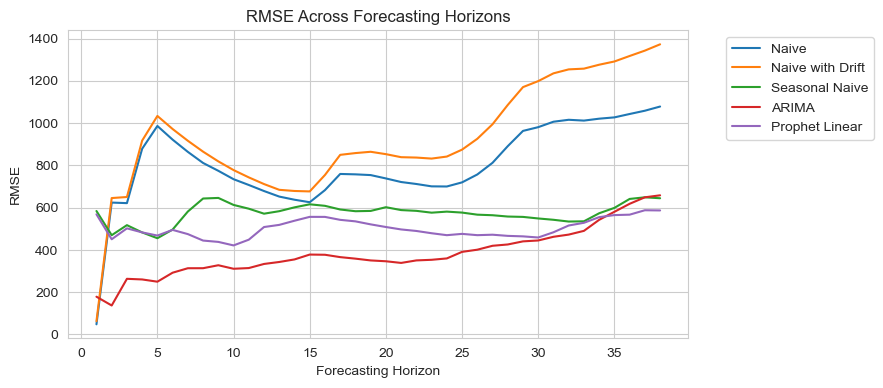

In [42]:
# Plot RMSE across forecasting horizons
plt.figure(figsize=(8, 4))
for i, model in enumerate(models):
    plt.plot(forecast_horizons, rmse_scores_across_horizons[i], label=model)

plt.xlabel('Forecasting Horizon')
plt.ylabel('RMSE')
plt.title('RMSE Across Forecasting Horizons')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<div style="text-align: justify">If we plot the performance metrics across forecasting horizons over the test set (as conducted above for RMSE), we can see that for majority period of time i.e from months around <strong>2 - 34,</strong> out of total 38 months (190 x 0.2 = 38 months), RMSE of <strong>ARIMA or SARIMA Model</strong> has always remained lower. It was only from months 34-38 where our Liner Growth Prophet Model (with Multiplicative Seasonality) made better predictions</div>

### Section 4.4: FITTING BEST MODEL

<div style="text-align: justify">From the above analysis, we conclude that we shall deem ARIMA or SARIMA(1,1,1)(4,1,0)[12] as our best model. Now we shall fit it on our entire time-series dataset and plot forecast for a meaningful horizon, let's say 2 years and also find the performace metrics over the entire existing time-serie data as below:<div>

In [43]:
data = pd.read_csv('zillow_sales.csv')  # Ensure the correct path to your file
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# ARIMA Model
arima_model = SARIMAX(data['zillow_sales'], order=(1, 1, 1), seasonal_order=(2, 1, 0, 12))
arima_result = arima_model.fit()
arima_forecast = arima_result.get_forecast(steps=24)  # Forecasting the next 2 years (24 months)
arima_forecast_index = pd.date_range(start=data.index[-1], periods=25, freq='M')[1:]
arima_forecast_values = arima_forecast.predicted_mean
confidence_intervals = arima_forecast.conf_int()

# Plotting
fig = go.Figure()

# Original Sales Data
fig.add_trace(go.Scatter(x=data.index, y=data['zillow_sales'], mode='lines', name='Original Sales'))

# ARIMA Forecast
fig.add_trace(go.Scatter(x=arima_forecast_index, y=arima_forecast_values, mode='lines', name='ARIMA Forecast',
                         line=dict(color='blue', dash='dot')))

# Confidence Intervals
fig.add_trace(go.Scatter(x=arima_forecast_index.tolist() + arima_forecast_index[::-1].tolist(),
                         y=confidence_intervals.iloc[:, 0].tolist() + confidence_intervals.iloc[:, 1][::-1].tolist(),
                         fill='toself', fillcolor='rgba(0,100,80,0.2)', 
                         line=dict(color='rgba(255,255,255,0)'), name='Confidence Interval'))

fig.update_layout(title='ARIMA Model Forecast with Confidence Intervals',
                  xaxis_title='Date',
                  yaxis_title='Sales',
                  showlegend=True)

fig.show()

In [44]:
# In-sample predictions (entire dataset)
predictions = arima_result.predict(start=data.index[0], end=data.index[-1], dynamic=False)
actuals = data['zillow_sales']

# Calculate errors
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = mean_absolute_percentage_error(actuals, predictions) * 100
residuals = np.abs(actuals - predictions)
mase = np.mean(residuals) / np.mean(np.abs(np.diff(actuals))) 

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"MASE: {mase}")

RMSE: 268.4819268470132
MAE: 196.69016820484288
MAPE: 8.528612507058781%
MASE: 0.6856602503036926


<div style="text-align: justify">After fitting ARIMA model to our entire dataset, we witness a further dip in RMSE and other metrics as it dipped from 383.24 to 268.48, thereby proving ARIMA to be an ideal model for forecasting our "zillow_sales" for reasonable time periods.</div>

## <div style="text-align: center">★★★★★★★★★★★★★★★★★★★★  "THE END" ★★★★★★★★★★★★★★★★★★★★★★</div>

# 

#